

1.   Ivan Febriand Muhammad (101319077)
2.   Arihon Siahaan (101319004)
3.   Syaloom Zefanya Tampi (101320121)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neural_network import MLPRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score, make_scorer, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [ ]:
def rmse (y_true, y_pred):
  rmse = mean_squared_error(y_true, y_pred, squared=True)
  return rmse

scorer = make_scorer(rmse, greater_is_better=False)

In [ ]:
A = pd.read_csv("https://raw.githubusercontent.com/qckid98/UAS-AI-PE/main/A.csv")
B = pd.read_csv("https://raw.githubusercontent.com/qckid98/UAS-AI-PE/main/B.csv")
C = pd.read_csv("https://raw.githubusercontent.com/qckid98/UAS-AI-PE/main/C.csv")

In [ ]:
A

,DEPTH_MD,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FACIES
0,734.419199,12.787381,NaN,1.407795,1.472684,NaN,118.992989,NaN,NaN,154.404816,NaN,9.875,26.911829,NaN,1
1,734.571200,12.790987,NaN,1.394810,1.464091,NaN,124.514305,NaN,NaN,154.974701,NaN,9.875,26.133530,NaN,1
2,734.723199,12.801331,NaN,1.377496,1.434632,NaN,126.779854,NaN,NaN,155.762970,NaN,9.875,27.482636,NaN,1
3,734.875200,12.628396,NaN,1.369218,1.419665,NaN,127.186066,NaN,NaN,156.187897,NaN,9.875,28.694523,NaN,1
4,735.027200,12.528492,NaN,1.373198,1.427742,NaN,125.184708,NaN,NaN,157.038986,NaN,9.875,28.981676,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,2361.275200,8.588360,NaN,NaN,NaN,2.431011,76.103134,NaN,3.360630,NaN,NaN,8.500,20.665428,-0.004571,3
10704,2361.427200,8.587591,NaN,NaN,NaN,2.426531,80.997704,NaN,3.400784,NaN,NaN,8.500,20.686266,-0.002504,3
10705,2361.579200,8.594840,NaN,NaN,NaN,2.422308,84.447113,NaN,3.389910,NaN,NaN,8.500,20.591324,0.000504,3
10706,2361.731200,8.594312,NaN,NaN,NaN,2.423292,86.449379,NaN,3.397406,NaN,NaN,8.500,19.437052,0.000550,3


In [ ]:
B

,DEPTH_MD,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FACIES
0,684.270396,13.042573,NaN,1.414800,1.419300,NaN,88.937462,0.455408,NaN,159.805603,NaN,9.875,39.320923,NaN,1
1,684.422396,13.333869,NaN,1.392074,1.398481,NaN,87.800705,0.450693,NaN,158.900360,NaN,9.875,33.086723,NaN,1
2,684.574396,13.426064,NaN,1.435466,1.449827,NaN,86.460014,0.450432,NaN,156.982590,NaN,9.875,28.410923,NaN,1
3,684.726396,13.320748,NaN,1.458956,1.479819,NaN,85.662811,0.461263,NaN,155.278259,NaN,9.875,19.690228,NaN,1
4,684.878396,13.156784,NaN,1.394103,1.403053,NaN,86.043411,0.464723,NaN,155.096039,NaN,9.875,15.122011,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,2207.310396,8.698007,NaN,5.382444,5.339929,2.531374,127.456139,NaN,3.607062,NaN,NaN,8.500,22.291321,0.107520,2
10021,2207.462396,8.721210,NaN,5.651109,5.689734,2.526128,128.403305,NaN,3.609151,NaN,NaN,8.500,22.230320,0.101821,2
10022,2207.614396,8.739136,NaN,5.870602,5.496074,2.528934,127.829262,NaN,3.594580,NaN,NaN,8.500,22.388054,0.097832,2
10023,2207.766396,8.749738,NaN,5.756996,5.345353,2.527052,126.552277,NaN,3.534883,NaN,NaN,8.500,23.331690,0.092334,2


In [ ]:
C

,DEPTH_MD,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FACIES
0,735.186799,13.305768,NaN,1.173534,1.168746,NaN,95.069916,0.106903,NaN,NaN,NaN,9.875,28.763554,NaN,1
1,735.338799,13.382214,NaN,1.173070,1.168229,NaN,93.822601,0.108549,NaN,NaN,NaN,9.875,28.810400,NaN,1
2,735.490799,13.448009,NaN,1.166865,1.160968,NaN,92.680122,0.114742,NaN,NaN,NaN,9.875,28.997326,NaN,1
3,735.642799,13.309155,NaN,1.158761,1.150311,NaN,93.568855,0.120261,NaN,NaN,NaN,9.875,29.191469,NaN,1
4,735.794799,13.254792,NaN,1.157357,1.146551,NaN,95.206711,0.124738,NaN,NaN,NaN,9.875,29.253410,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9133,2123.402799,8.465826,NaN,1.508918,1.399308,2.560775,29.390390,NaN,4.527966,NaN,NaN,8.500,14.614906,0.082481,8
9134,2123.554799,8.461417,NaN,1.714523,1.421449,2.553309,21.255514,NaN,4.415823,NaN,NaN,8.500,13.537938,0.078607,8
9135,2123.706799,8.473491,NaN,1.770941,1.414646,2.515362,19.803230,NaN,4.339602,NaN,NaN,8.500,11.451546,0.067462,8
9136,2123.858799,8.459172,NaN,2.338948,2.335207,2.499653,19.054888,NaN,4.305042,NaN,NaN,8.500,11.103429,0.065294,8


In [ ]:
A.drop(['RSHA', 'SP', 'BS', 'DEPTH_MD'], axis=1,inplace=True)
B.drop(['RSHA', 'SP', 'BS', 'DEPTH_MD'], axis=1,inplace=True)
C.drop(['RSHA', 'SP', 'BS', 'DEPTH_MD'], axis=1,inplace=True)

#Pre-Processing

##Well A



In [ ]:
X = A.drop(['FACIES'], axis=1)
y = A['FACIES']

In [ ]:
X

,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,ROP,DRHO
0,12.787381,1.407795,1.472684,NaN,118.992989,NaN,NaN,154.404816,26.911829,NaN
1,12.790987,1.394810,1.464091,NaN,124.514305,NaN,NaN,154.974701,26.133530,NaN
2,12.801331,1.377496,1.434632,NaN,126.779854,NaN,NaN,155.762970,27.482636,NaN
3,12.628396,1.369218,1.419665,NaN,127.186066,NaN,NaN,156.187897,28.694523,NaN
4,12.528492,1.373198,1.427742,NaN,125.184708,NaN,NaN,157.038986,28.981676,NaN
...,...,...,...,...,...,...,...,...,...,...
10703,8.588360,NaN,NaN,2.431011,76.103134,NaN,3.360630,NaN,20.665428,-0.004571
10704,8.587591,NaN,NaN,2.426531,80.997704,NaN,3.400784,NaN,20.686266,-0.002504
10705,8.594840,NaN,NaN,2.422308,84.447113,NaN,3.389910,NaN,20.591324,0.000504
10706,8.594312,NaN,NaN,2.423292,86.449379,NaN,3.397406,NaN,19.437052,0.000550


In [ ]:
header = X.columns
header

Index(['CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'ROP',
       'DRHO'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
imputer = KNNImputer(n_neighbors=6)
X_imputed = imputer.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=100, max_iter=1000)
result = kmeans.fit_predict(X_imputed)
result += 1

In [ ]:
X_with_head = pd.DataFrame(X_imputed, columns=header)
X_with_head['cluster'] = result

In [ ]:
true_labels = pd.DataFrame(X_imputed, columns=header)
true_labels['FACIES'] = y

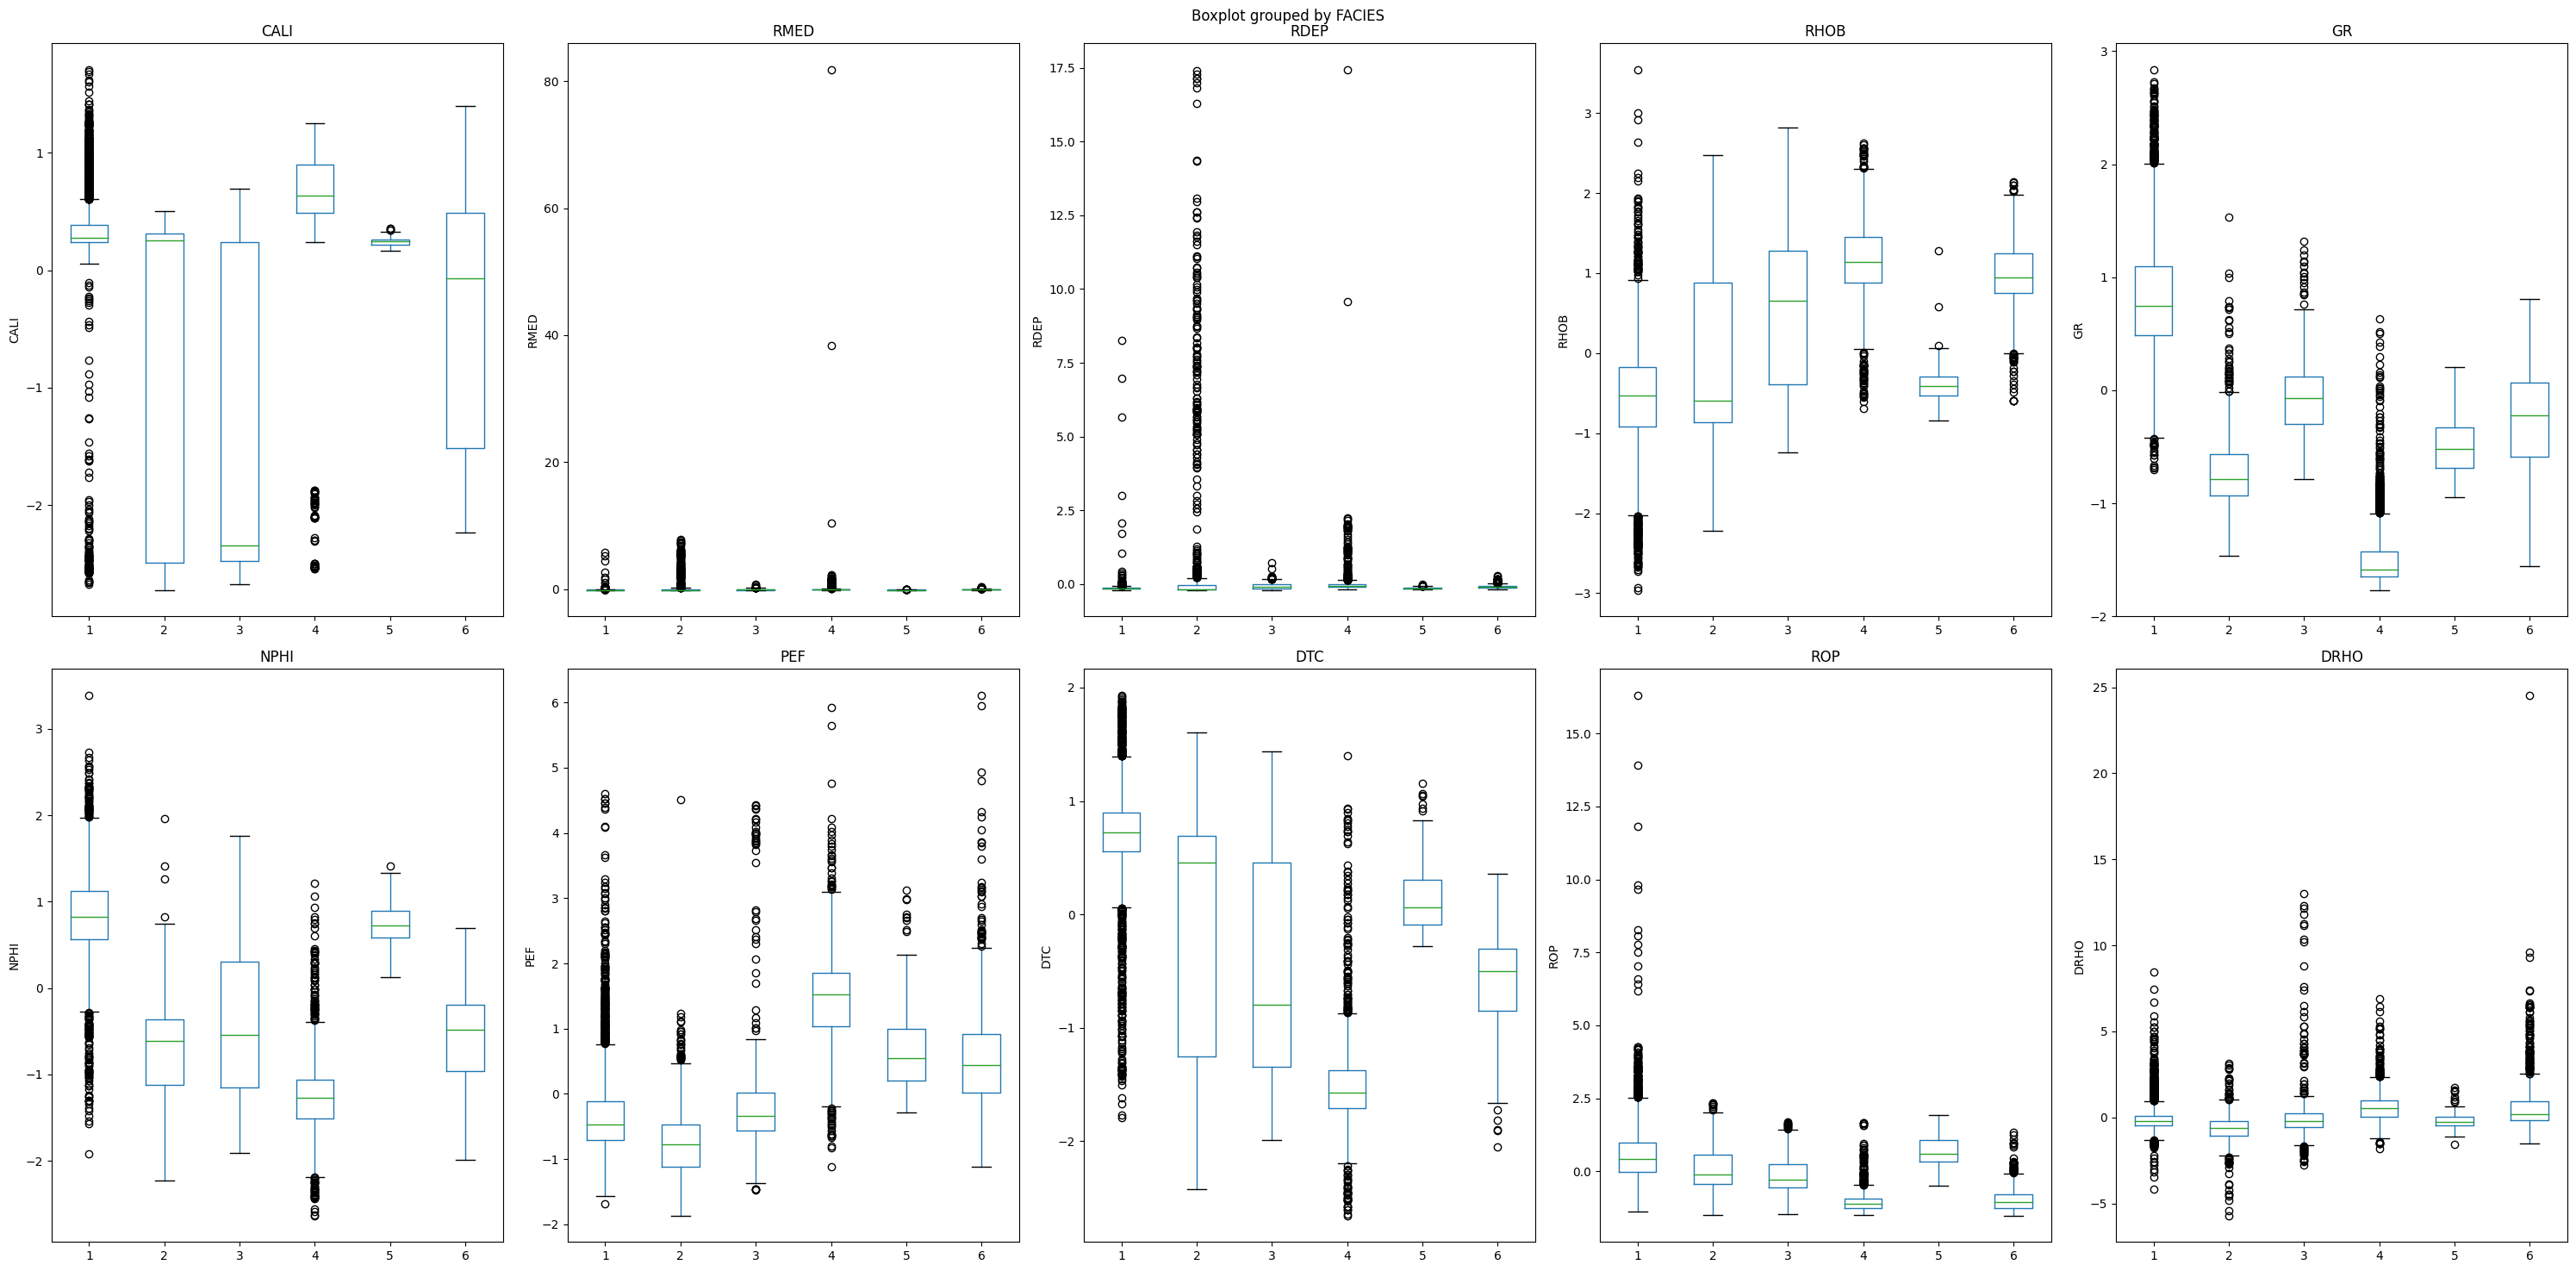

In [ ]:
fig, axes = plt.subplots((len(true_labels.columns)-1) // 5, 5, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(true_labels.columns[:-1]):
    ax = axes[i]
    true_labels.boxplot(column=[col], by=['FACIES'], grid=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel(col)


plt.tight_layout()
plt.show()


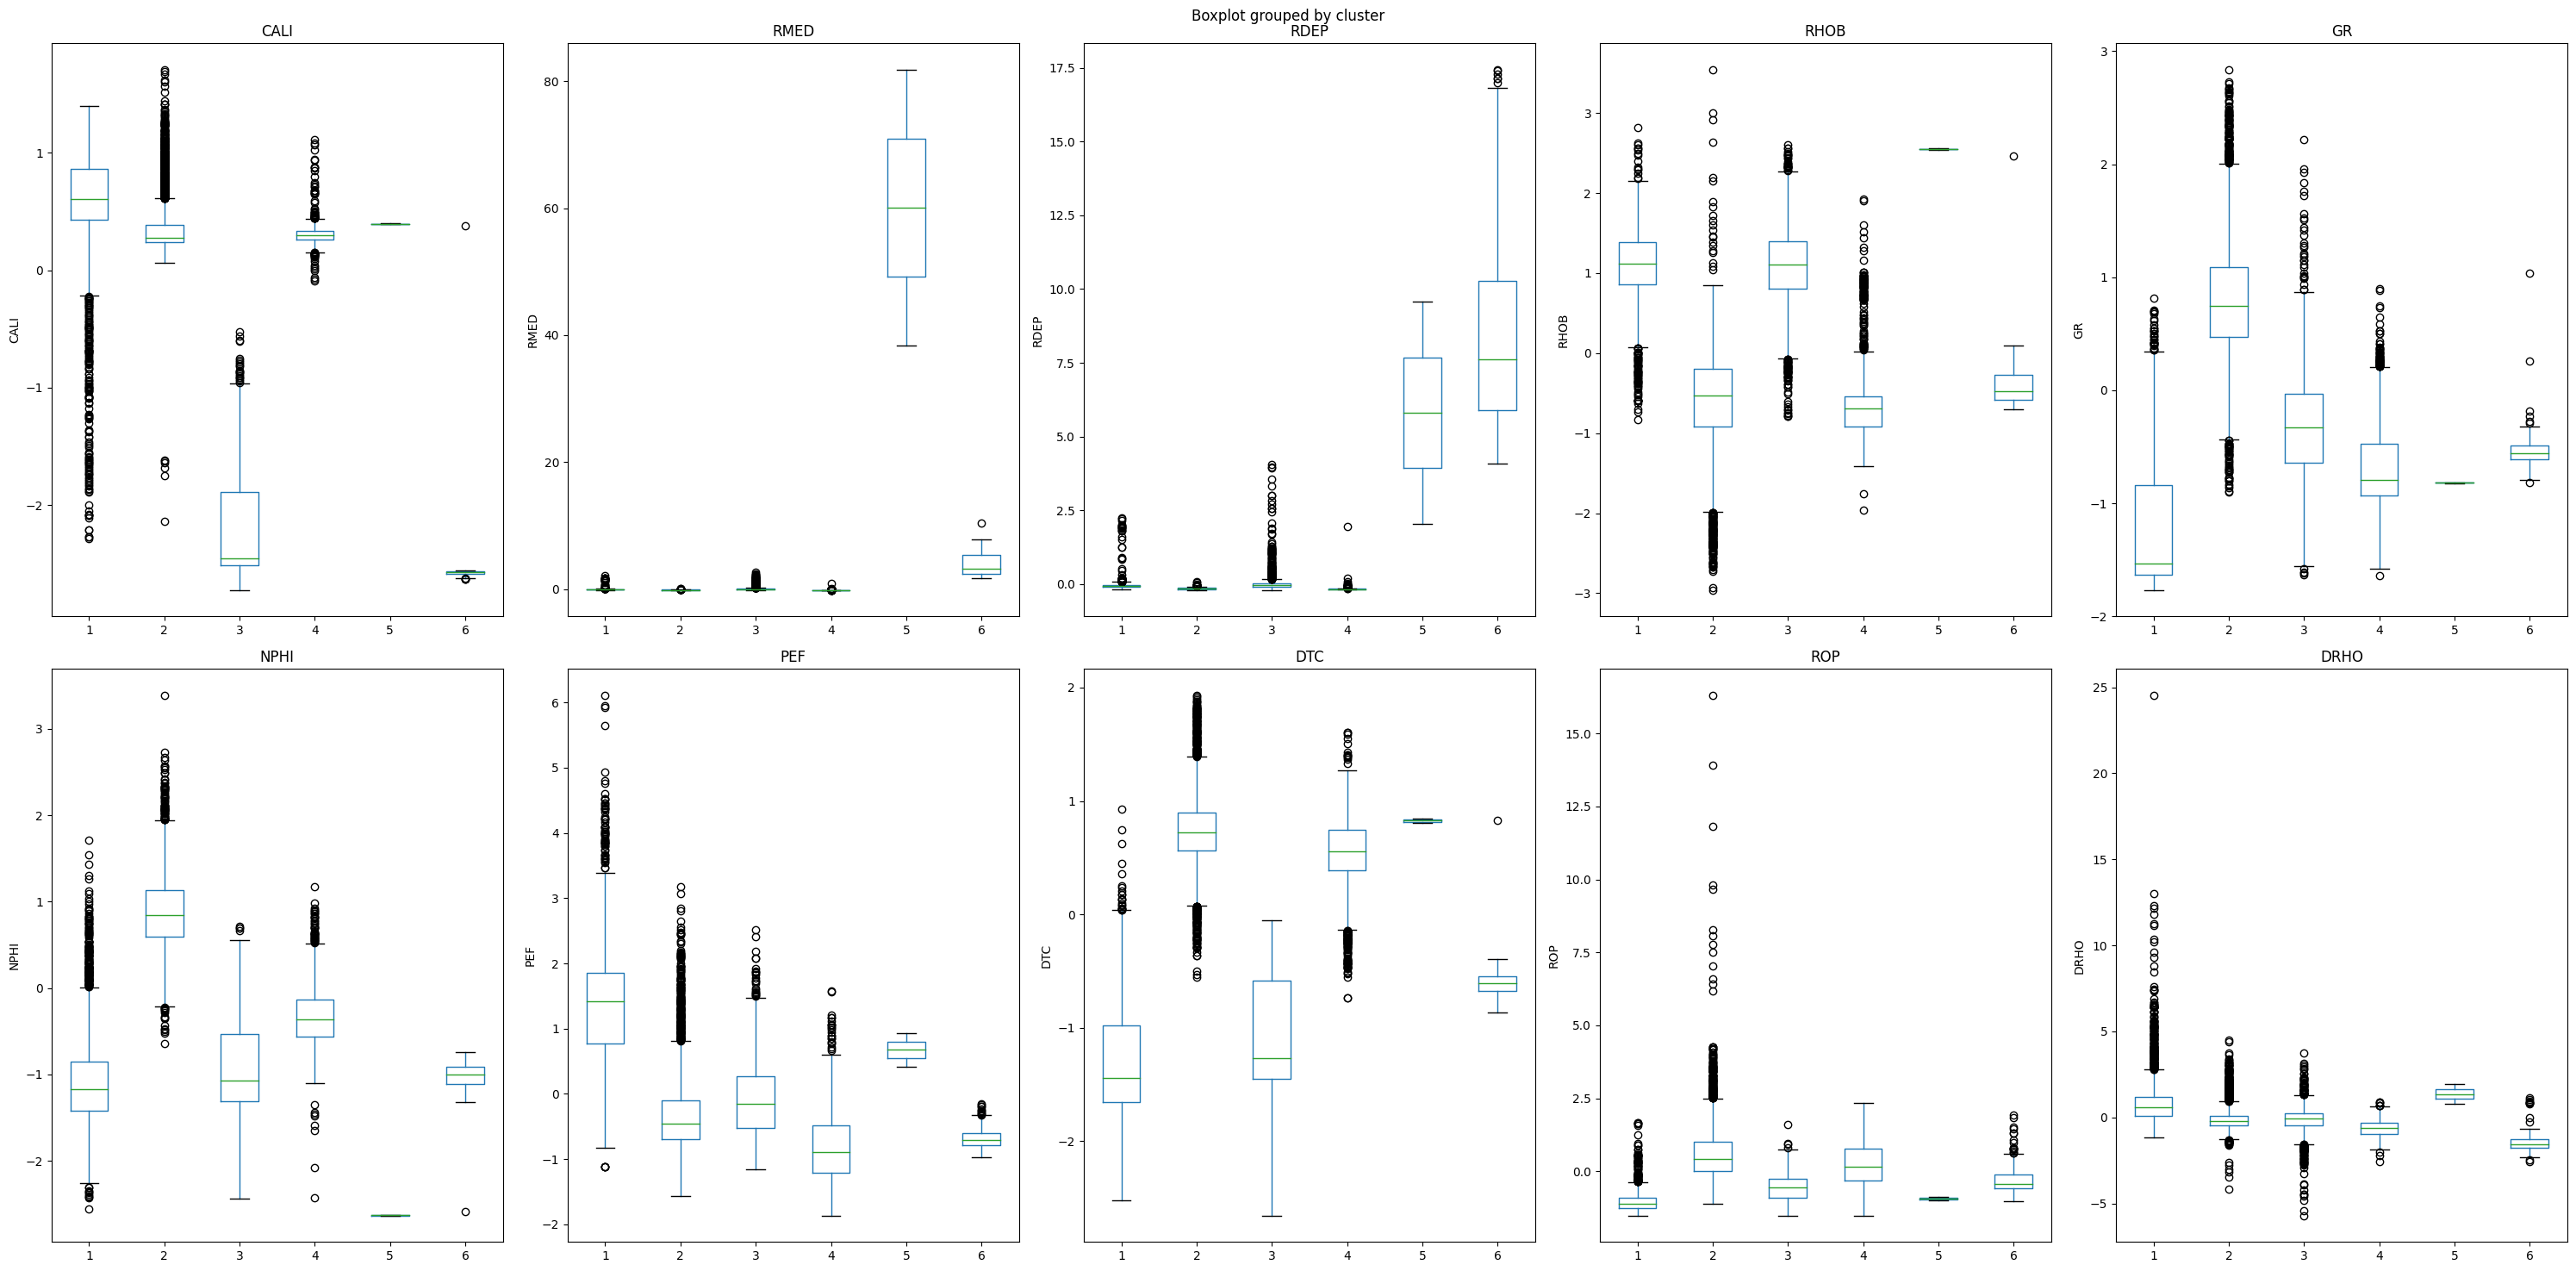

In [ ]:
fig, axes = plt.subplots((len(X_with_head.columns)-1) // 5, 5, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(X_with_head.columns[:-1]):
    ax = axes[i]
    X_with_head.boxplot(column=[col], by=['cluster'], grid=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel(col)


plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=32)

##Well B

In [ ]:
X = B.drop(['FACIES'], axis=1)
y = B['FACIES']

In [ ]:
X

,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,ROP,DRHO
0,13.042573,1.414800,1.419300,NaN,88.937462,0.455408,NaN,159.805603,39.320923,NaN
1,13.333869,1.392074,1.398481,NaN,87.800705,0.450693,NaN,158.900360,33.086723,NaN
2,13.426064,1.435466,1.449827,NaN,86.460014,0.450432,NaN,156.982590,28.410923,NaN
3,13.320748,1.458956,1.479819,NaN,85.662811,0.461263,NaN,155.278259,19.690228,NaN
4,13.156784,1.394103,1.403053,NaN,86.043411,0.464723,NaN,155.096039,15.122011,NaN
...,...,...,...,...,...,...,...,...,...,...
10020,8.698007,5.382444,5.339929,2.531374,127.456139,NaN,3.607062,NaN,22.291321,0.107520
10021,8.721210,5.651109,5.689734,2.526128,128.403305,NaN,3.609151,NaN,22.230320,0.101821
10022,8.739136,5.870602,5.496074,2.528934,127.829262,NaN,3.594580,NaN,22.388054,0.097832
10023,8.749738,5.756996,5.345353,2.527052,126.552277,NaN,3.534883,NaN,23.331690,0.092334


In [ ]:
header = X.columns
header

Index(['CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'ROP',
       'DRHO'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
imputer = KNNImputer(n_neighbors=6)
X_imputed = imputer.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=100, max_iter=1000)
result = kmeans.fit_predict(X_imputed)
result += 1

In [ ]:
X_with_head = pd.DataFrame(X_imputed, columns=header)
X_with_head['cluster'] = result

In [ ]:
true_labels = pd.DataFrame(X_imputed, columns=header)
true_labels['FACIES'] = y

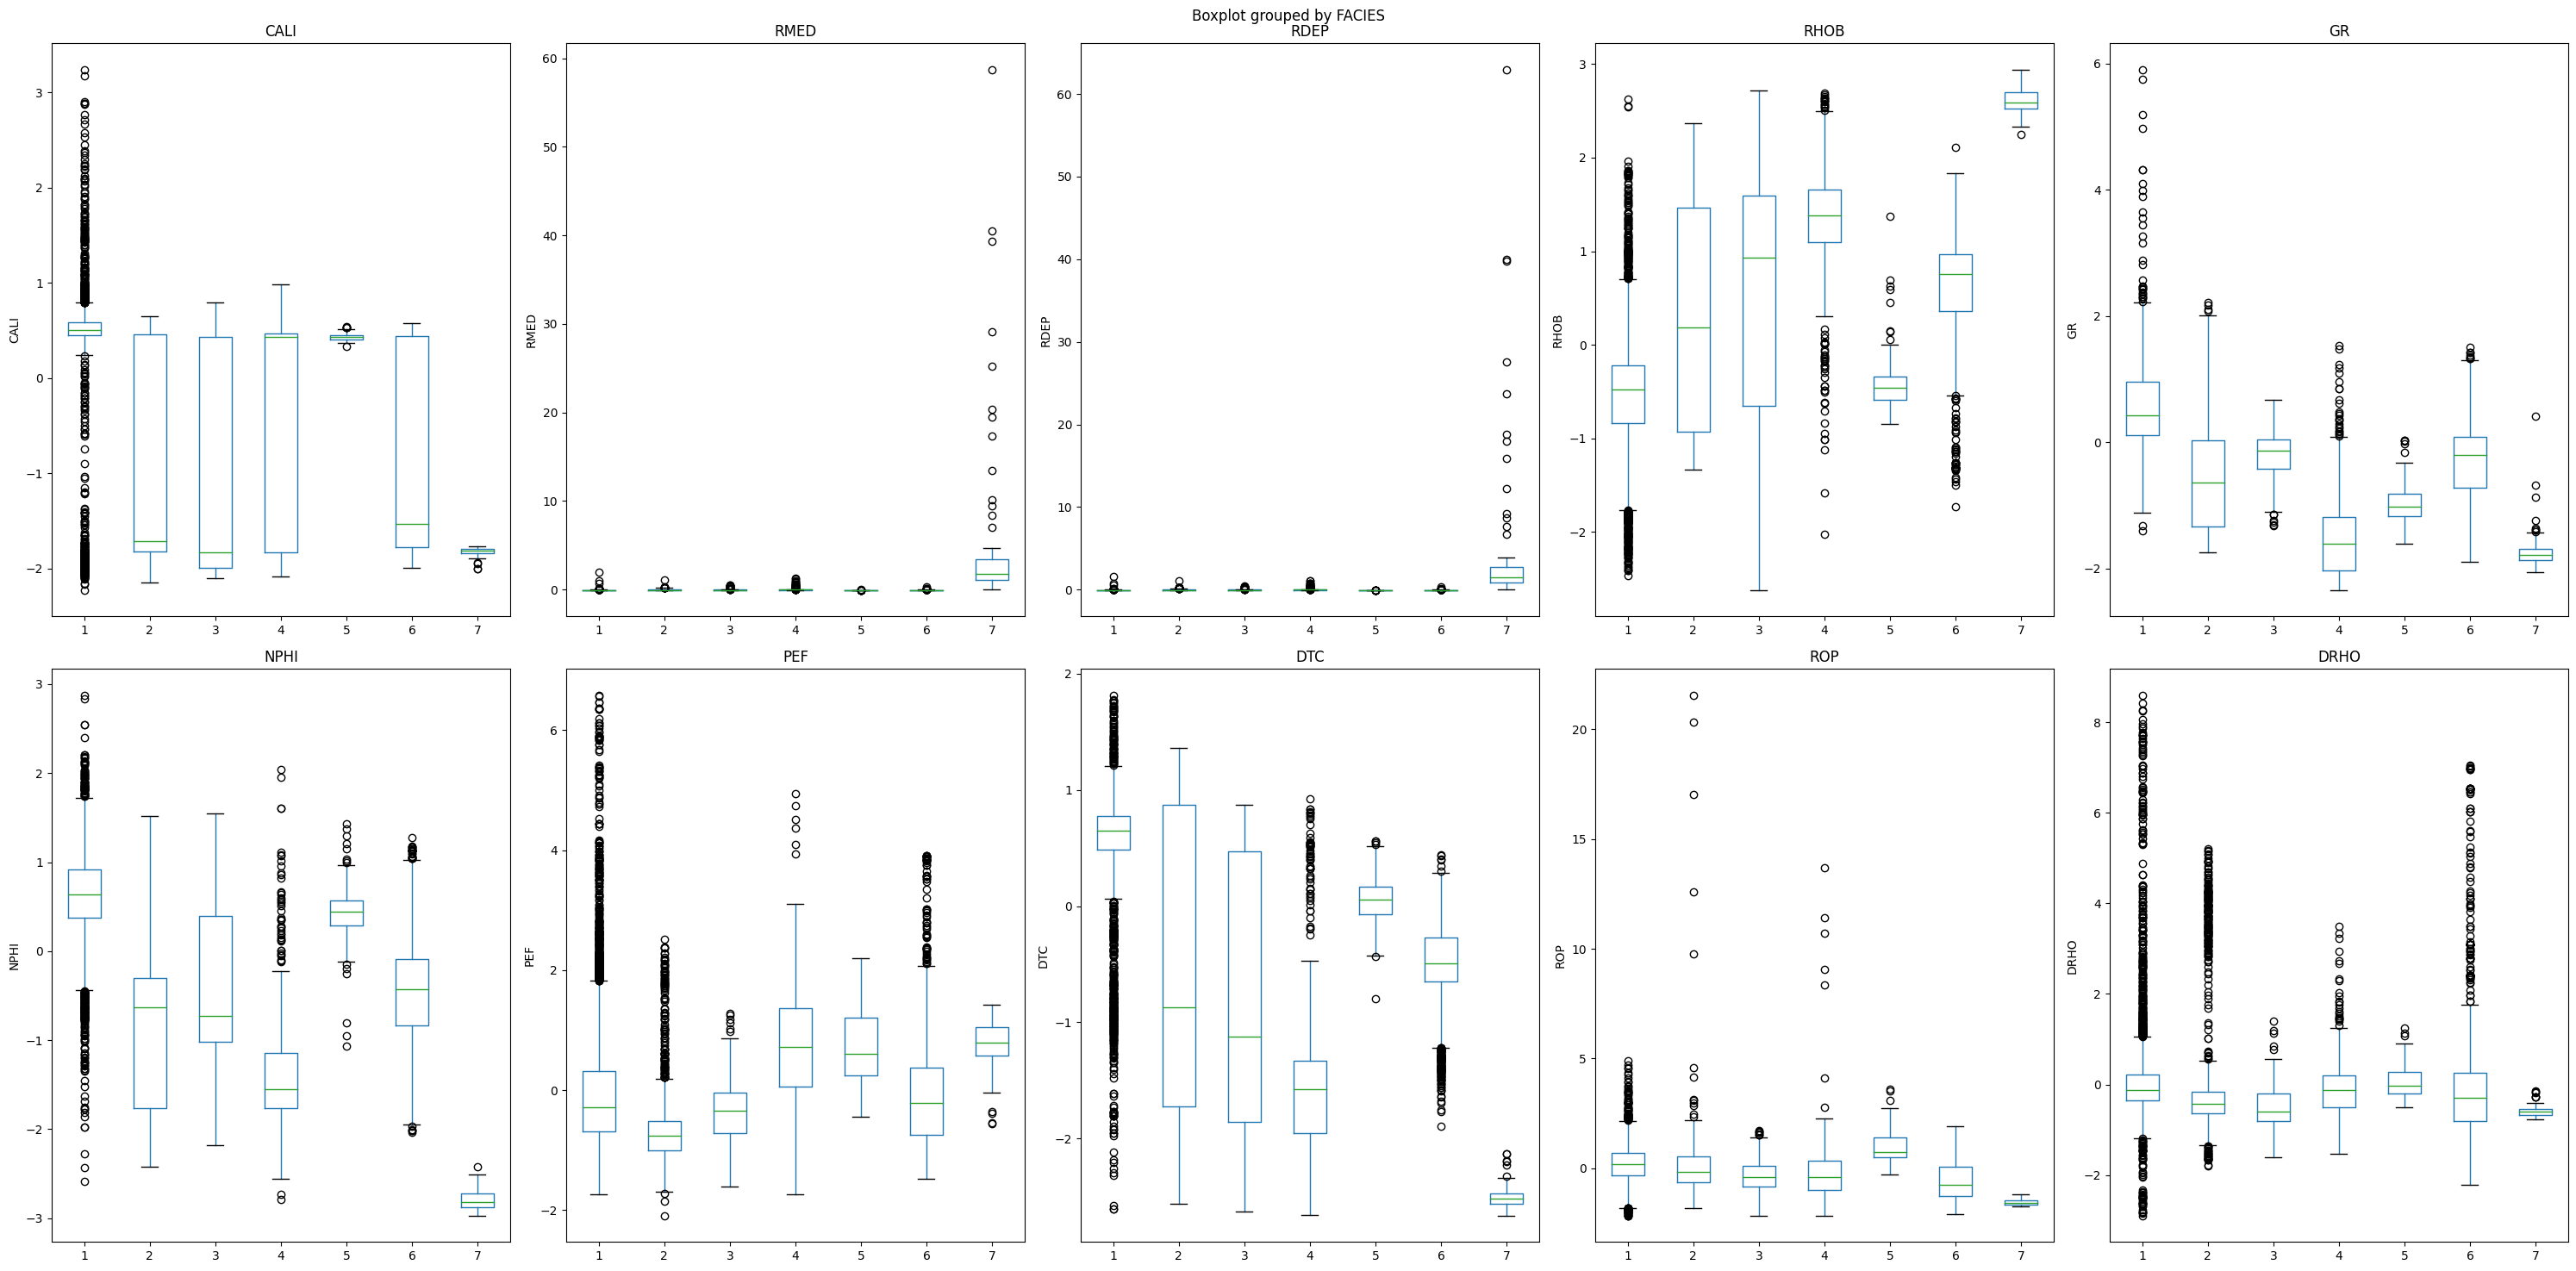

In [ ]:
fig, axes = plt.subplots((len(true_labels.columns)-1) // 5, 5, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(true_labels.columns[:-1]):
    ax = axes[i]
    true_labels.boxplot(column=[col], by=['FACIES'], grid=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel(col)


plt.tight_layout()
plt.show()


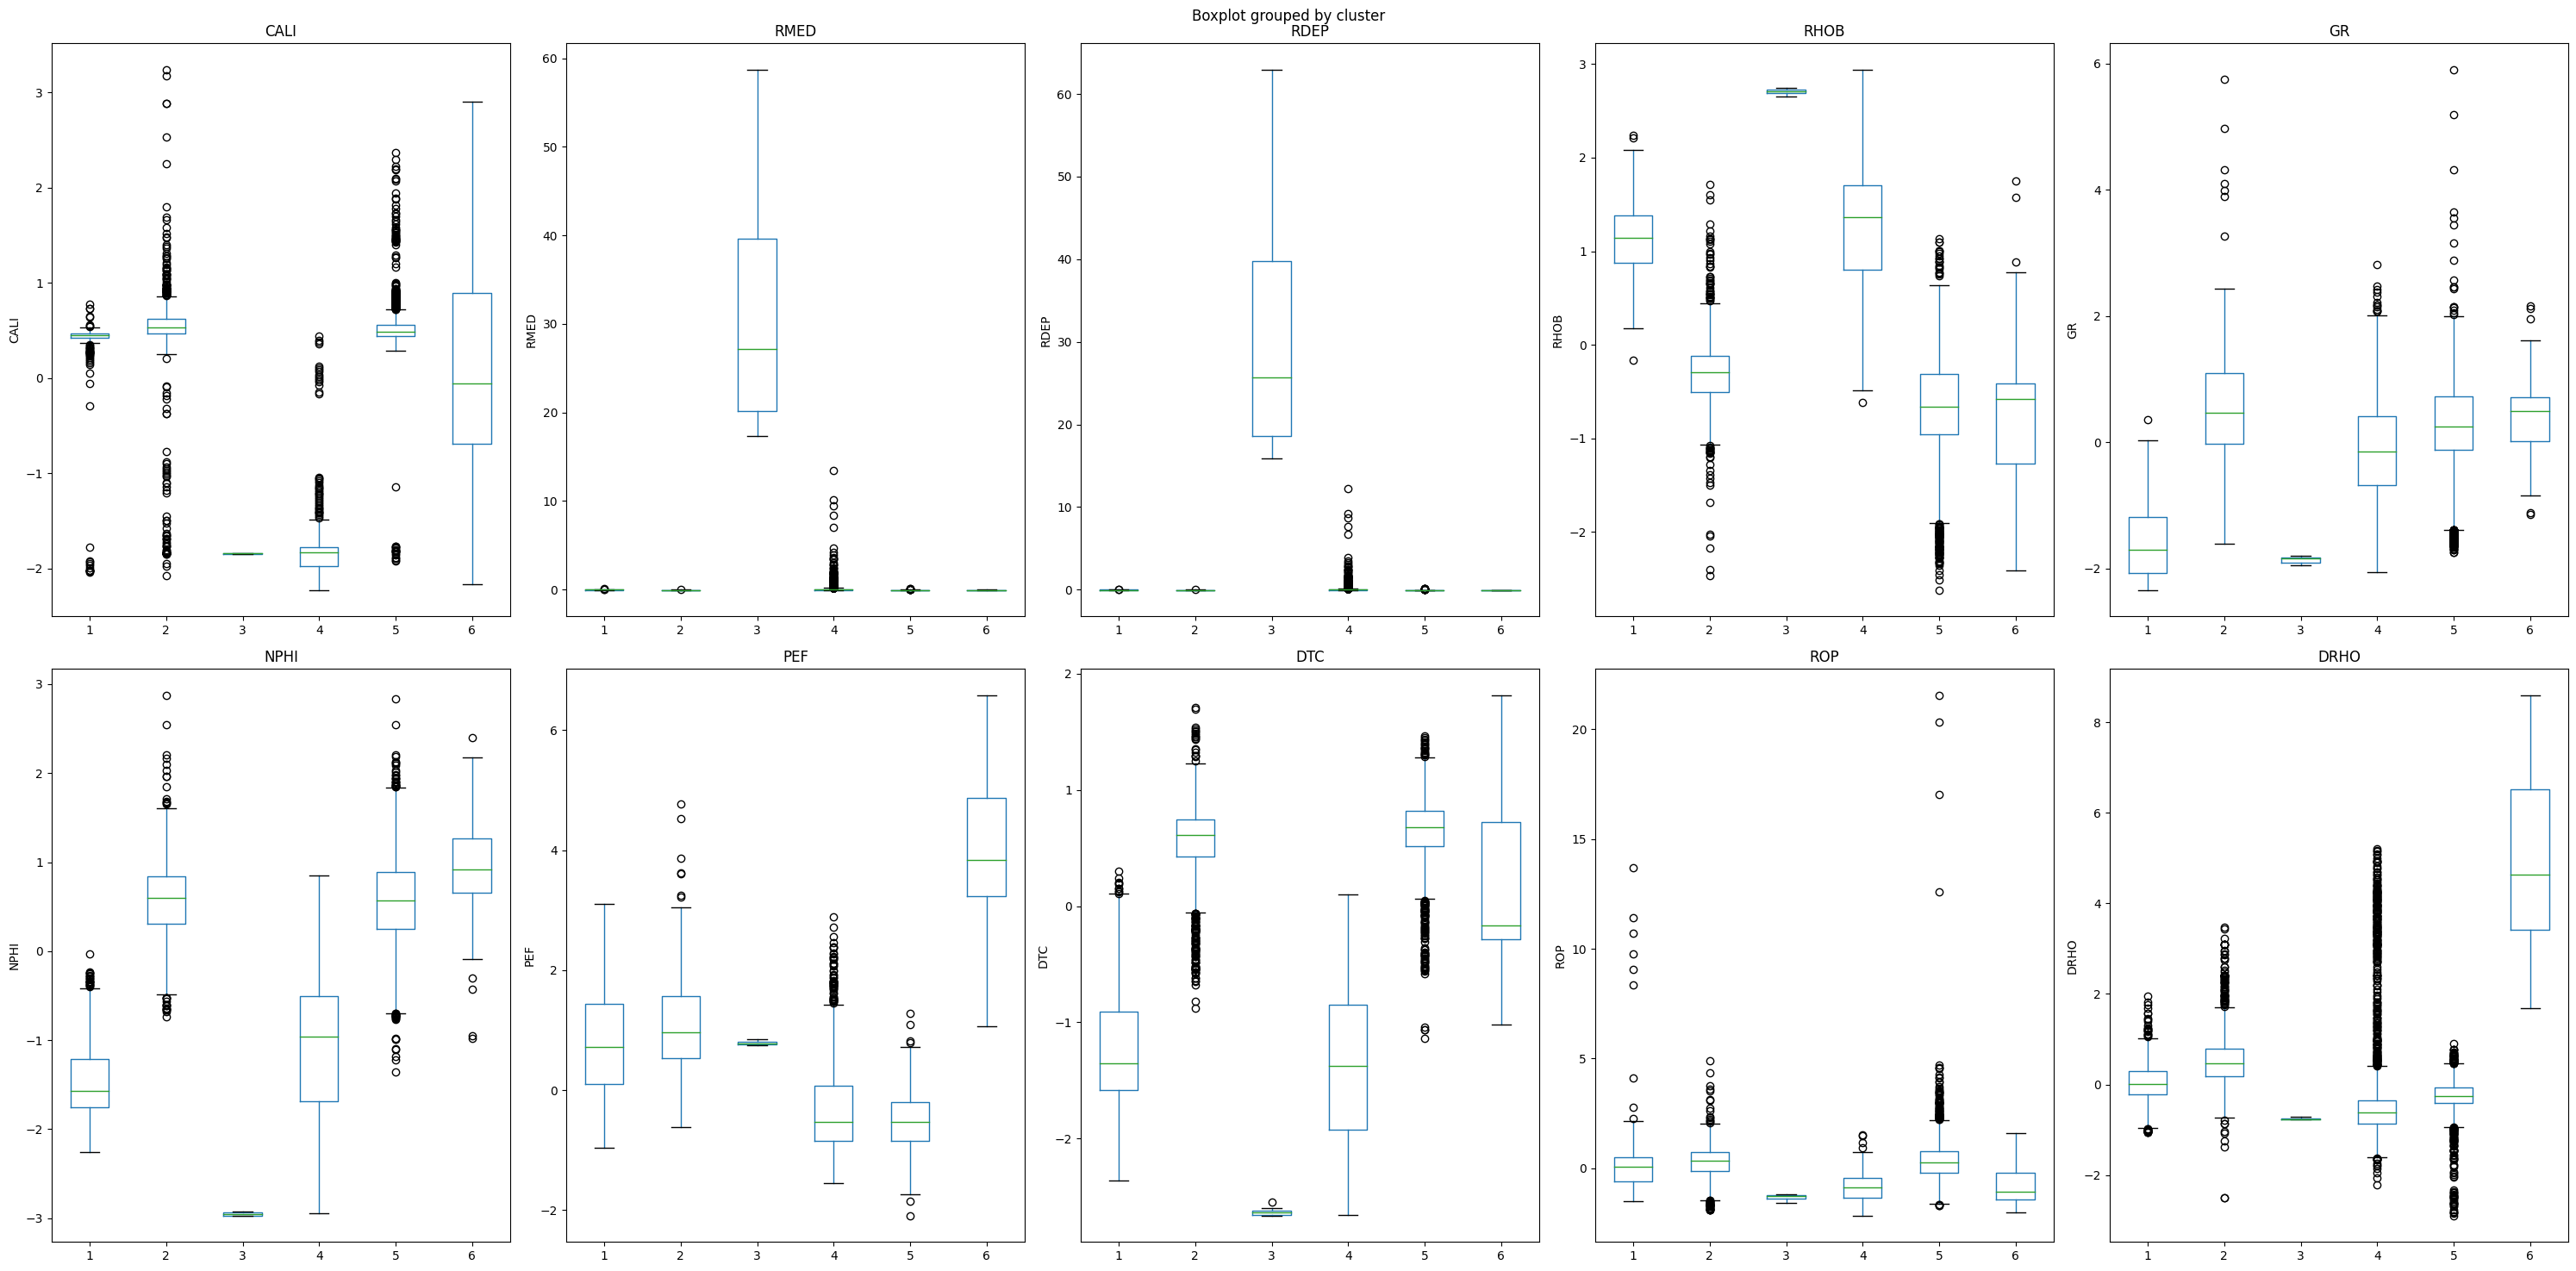

In [ ]:
fig, axes = plt.subplots((len(X_with_head.columns)-1) // 5, 5, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(X_with_head.columns[:-1]):
    ax = axes[i]
    X_with_head.boxplot(column=[col], by=['cluster'], grid=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel(col)


plt.tight_layout()
plt.show()

In [ ]:
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_imputed, y, test_size=0.2, random_state=32)

##Well C

In [ ]:
X = C.drop(['FACIES'], axis=1)
y_C = C['FACIES']

In [ ]:
X

,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,ROP,DRHO
0,13.305768,1.173534,1.168746,NaN,95.069916,0.106903,NaN,NaN,28.763554,NaN
1,13.382214,1.173070,1.168229,NaN,93.822601,0.108549,NaN,NaN,28.810400,NaN
2,13.448009,1.166865,1.160968,NaN,92.680122,0.114742,NaN,NaN,28.997326,NaN
3,13.309155,1.158761,1.150311,NaN,93.568855,0.120261,NaN,NaN,29.191469,NaN
4,13.254792,1.157357,1.146551,NaN,95.206711,0.124738,NaN,NaN,29.253410,NaN
...,...,...,...,...,...,...,...,...,...,...
9133,8.465826,1.508918,1.399308,2.560775,29.390390,NaN,4.527966,NaN,14.614906,0.082481
9134,8.461417,1.714523,1.421449,2.553309,21.255514,NaN,4.415823,NaN,13.537938,0.078607
9135,8.473491,1.770941,1.414646,2.515362,19.803230,NaN,4.339602,NaN,11.451546,0.067462
9136,8.459172,2.338948,2.335207,2.499653,19.054888,NaN,4.305042,NaN,11.103429,0.065294


In [ ]:
header = X.columns
header

Index(['CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'ROP',
       'DRHO'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
imputer = KNNImputer(n_neighbors=6)
X_imputed = imputer.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=100, max_iter=1000)
result = kmeans.fit_predict(X_imputed)
result += 1

In [ ]:
X_with_head = pd.DataFrame(X_imputed, columns=header)
X_with_head['cluster'] = result

In [ ]:
true_labels = pd.DataFrame(X_imputed, columns=header)
true_labels['FACIES'] = y_C

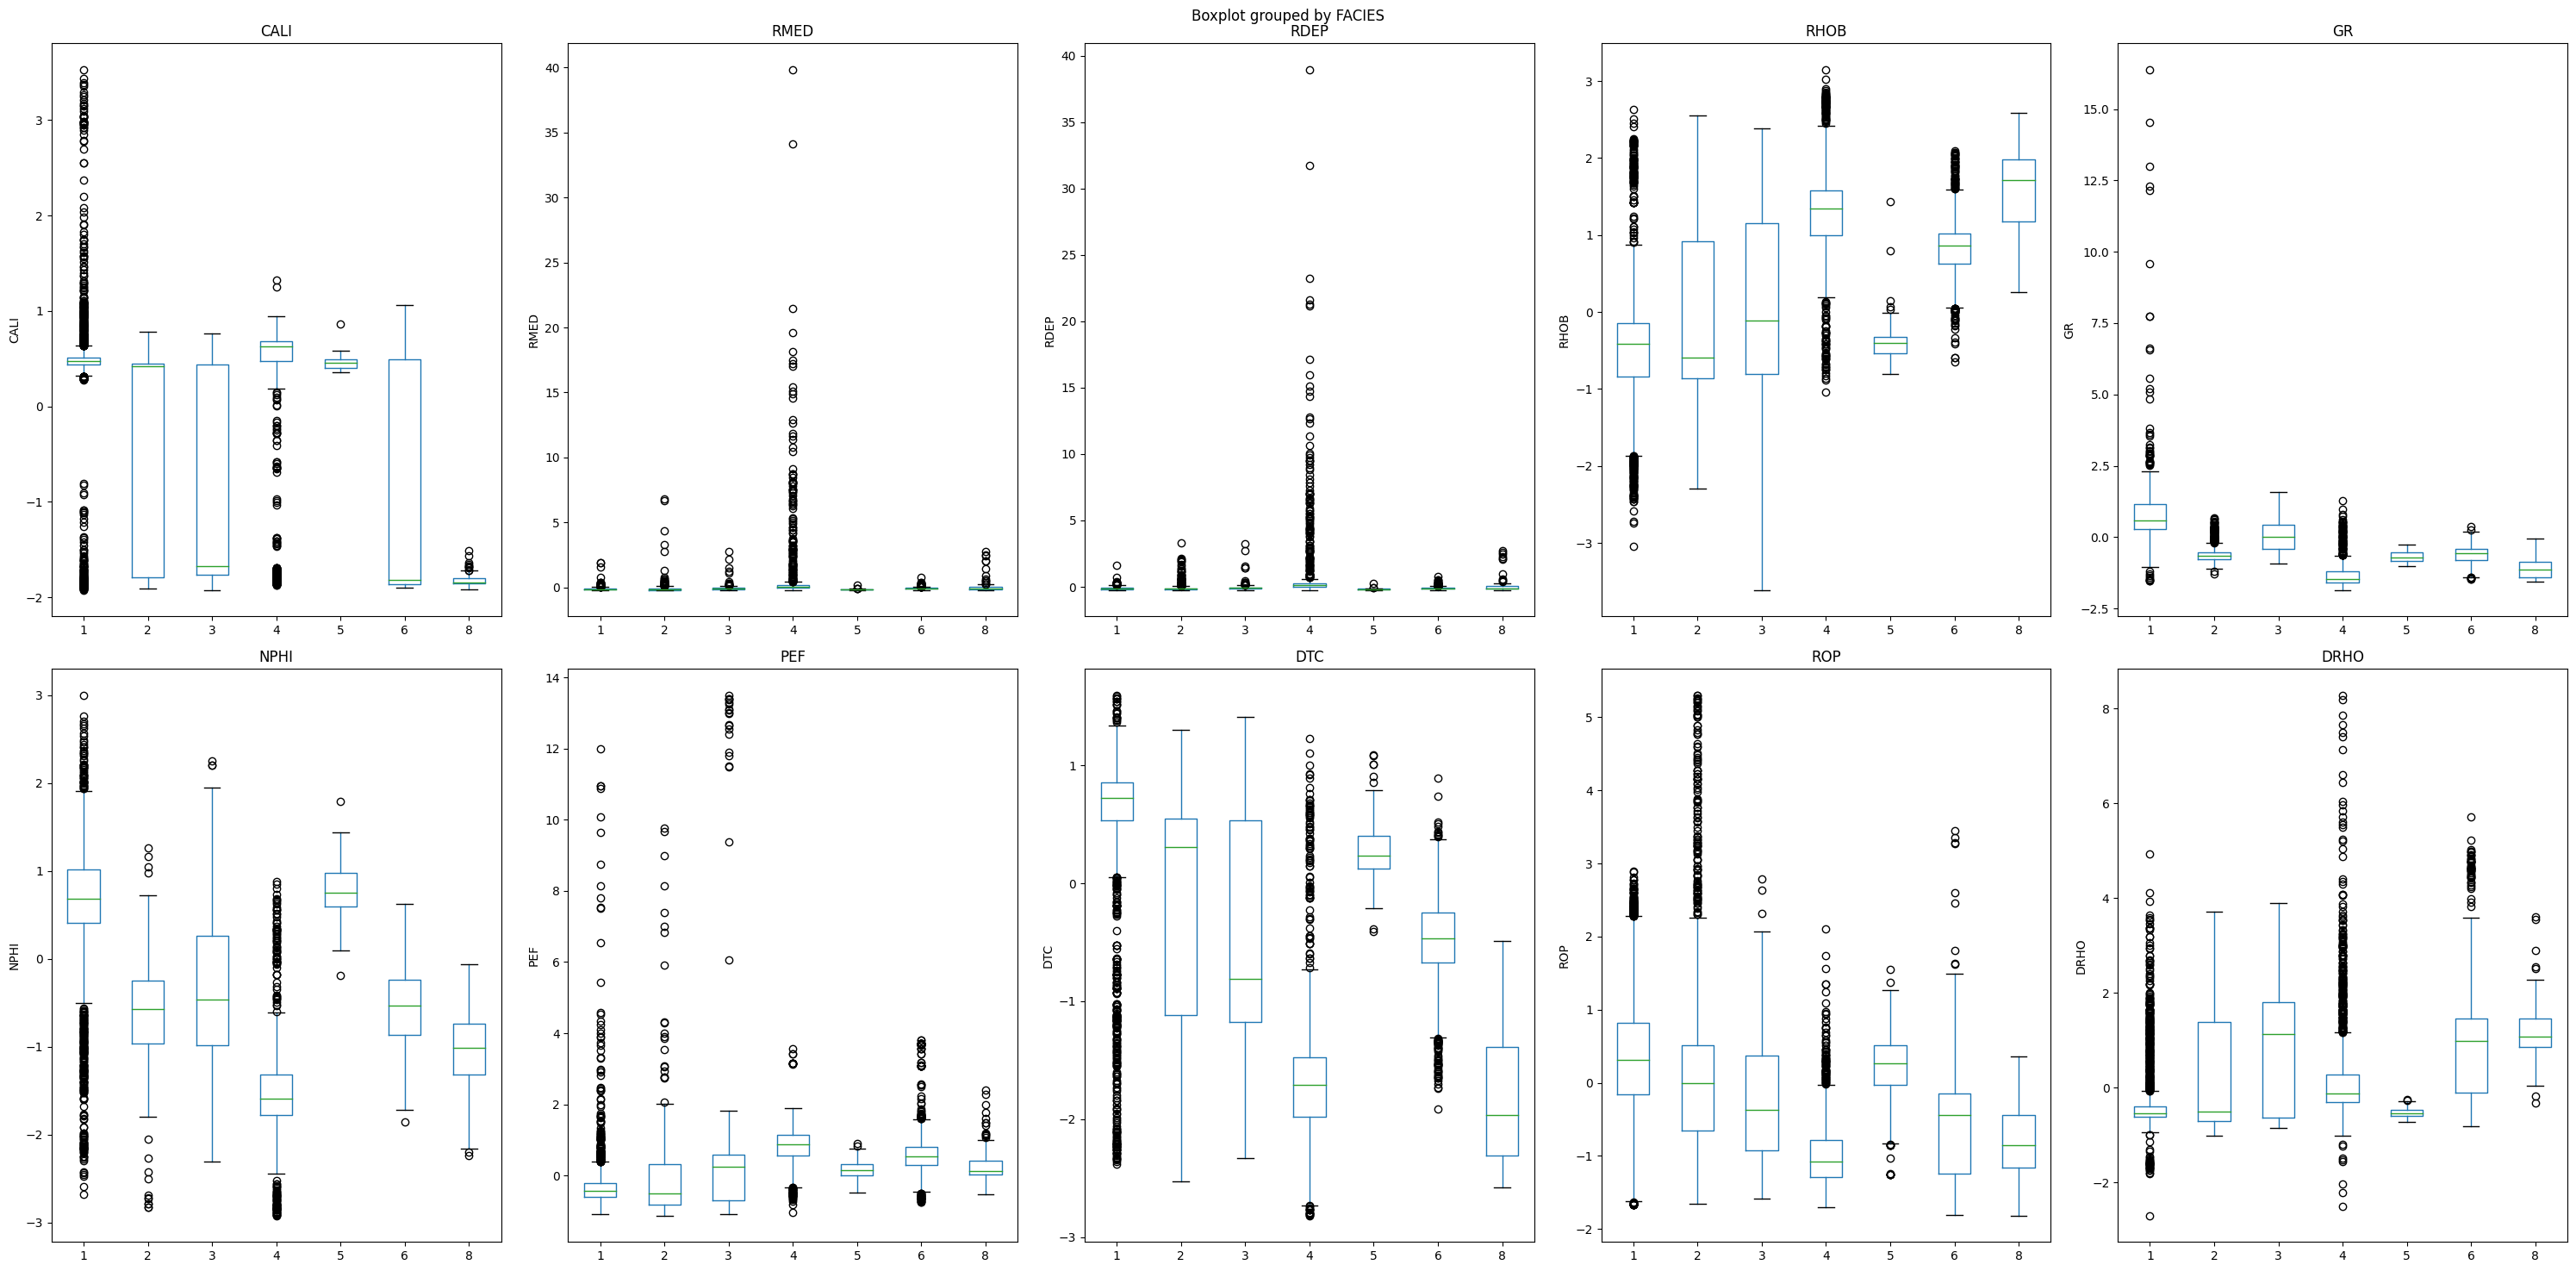

In [ ]:
fig, axes = plt.subplots((len(true_labels.columns)-1) // 5, 5, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(true_labels.columns[:-1]):
    ax = axes[i]
    true_labels.boxplot(column=[col], by=['FACIES'], grid=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel(col)


plt.tight_layout()
plt.show()


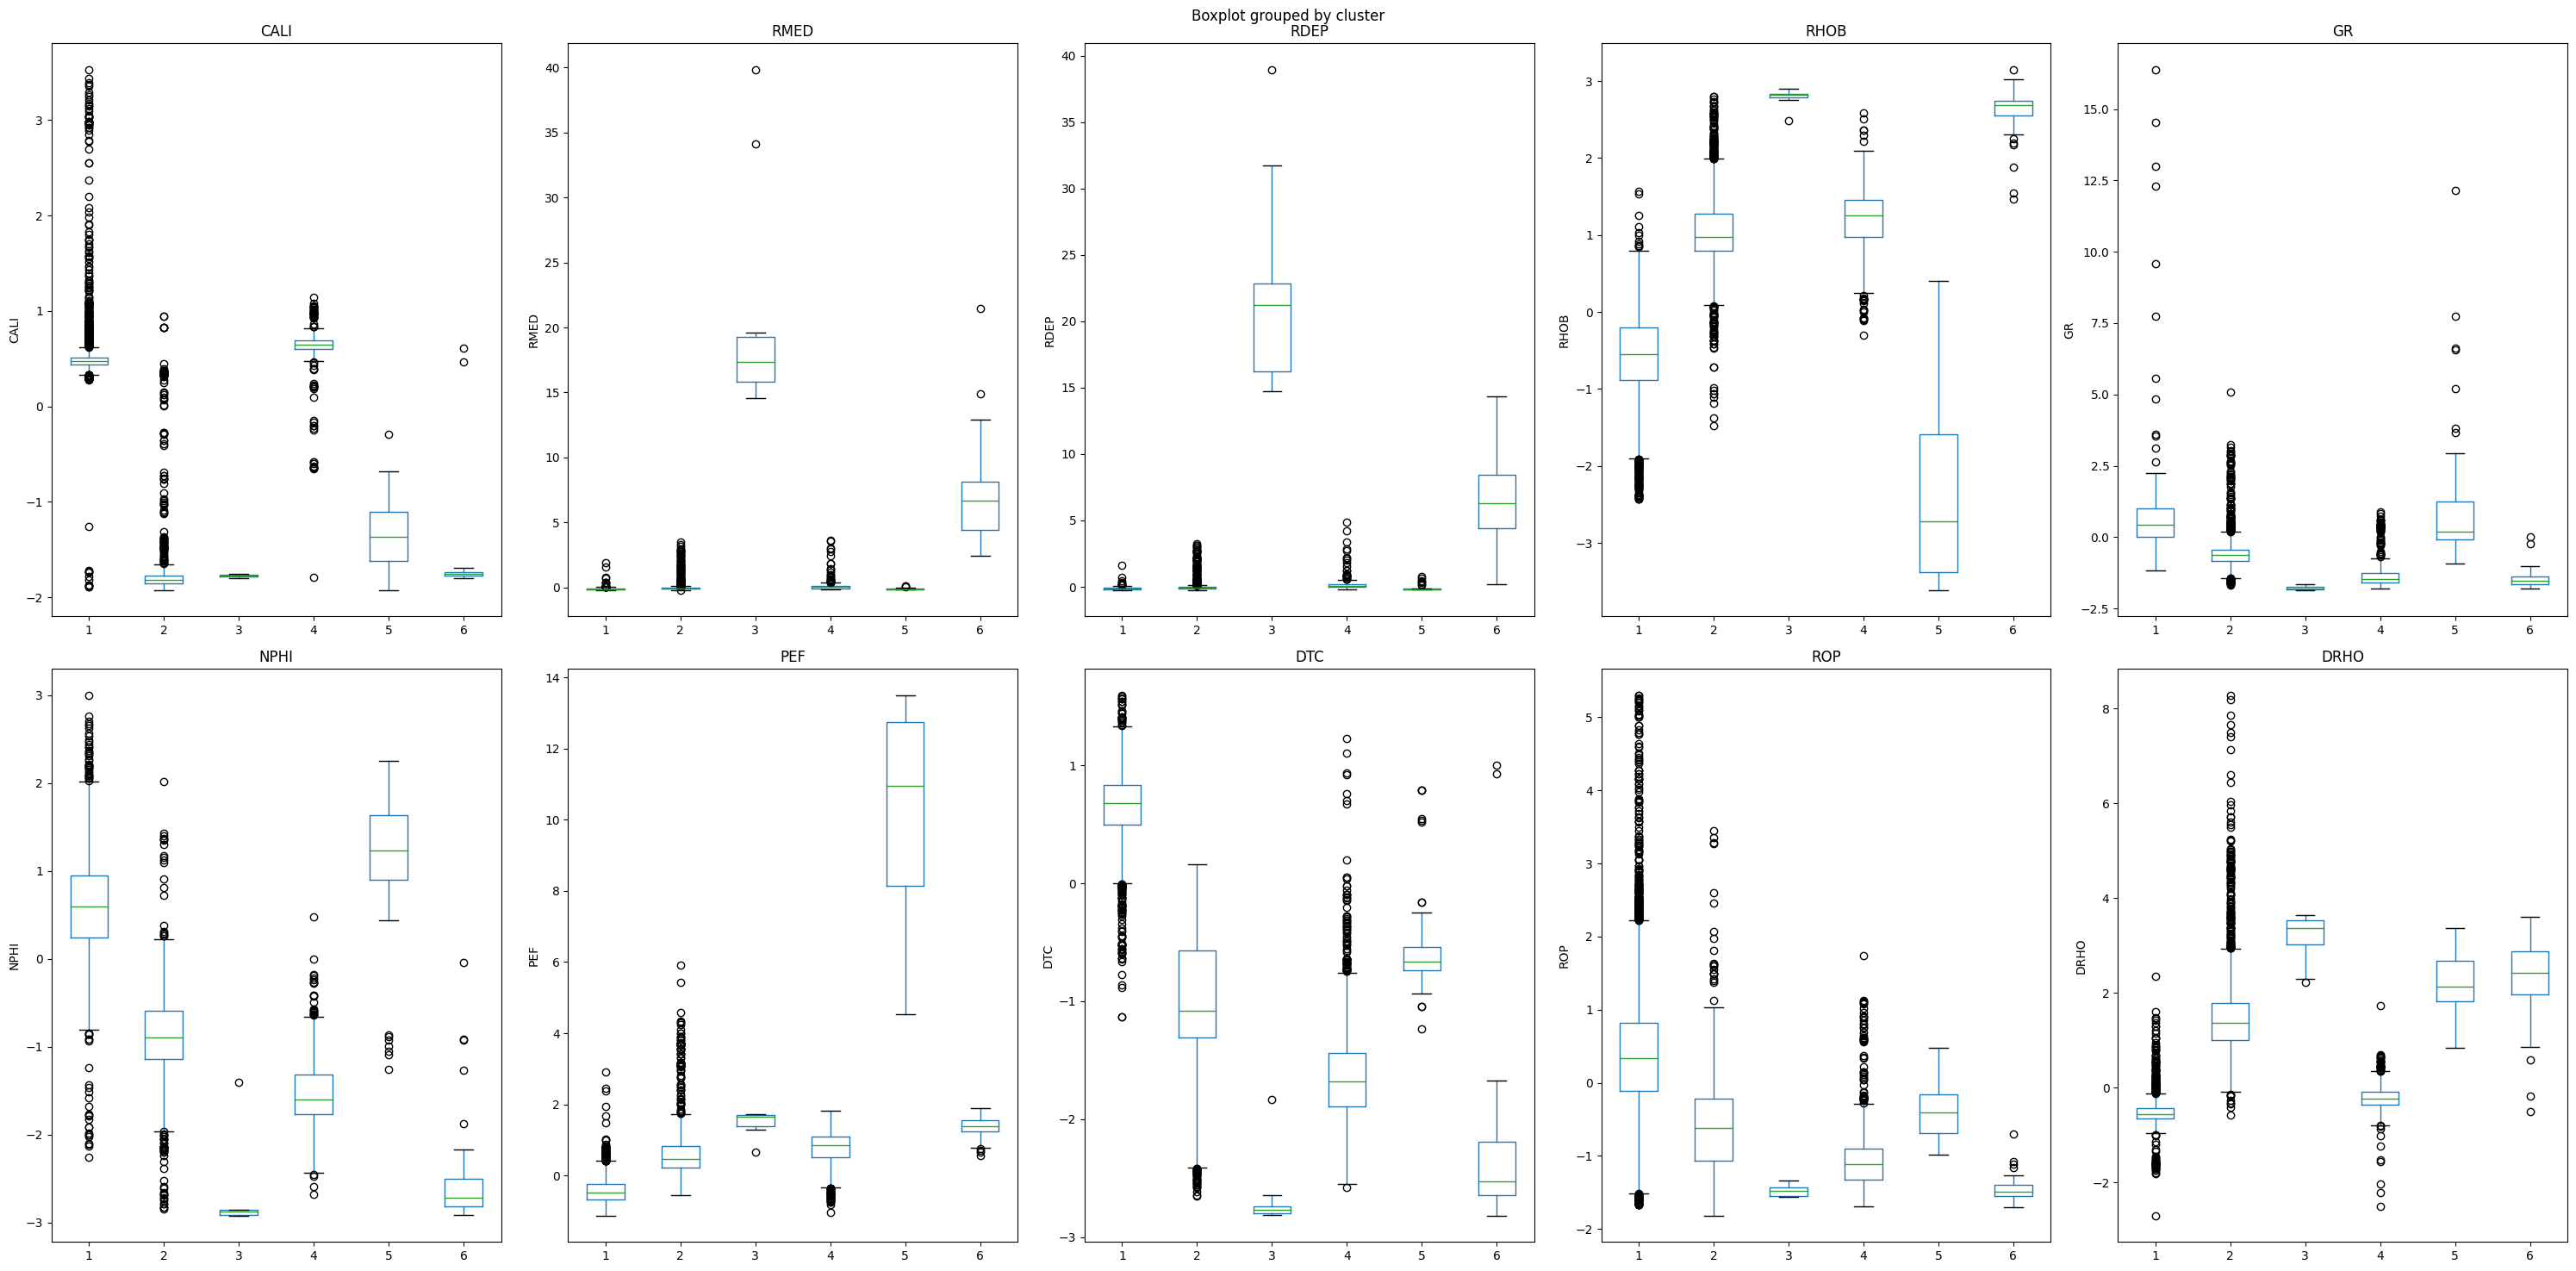

In [ ]:
fig, axes = plt.subplots((len(X_with_head.columns)-1) // 5, 5, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(X_with_head.columns[:-1]):
    ax = axes[i]
    X_with_head.boxplot(column=[col], by=['cluster'], grid=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel(col)


plt.tight_layout()
plt.show()

In [ ]:
X_C = X_imputed

##A and B Joined

In [ ]:
A_and_B = pd.concat([A, B], ignore_index=True)
X_joined = A_and_B.drop(['FACIES'], axis=1)
y_joined = A_and_B['FACIES']

In [ ]:
X_joined

,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,ROP,DRHO
0,12.787381,1.407795,1.472684,NaN,118.992989,NaN,NaN,154.404816,26.911829,NaN
1,12.790987,1.394810,1.464091,NaN,124.514305,NaN,NaN,154.974701,26.133530,NaN
2,12.801331,1.377496,1.434632,NaN,126.779854,NaN,NaN,155.762970,27.482636,NaN
3,12.628396,1.369218,1.419665,NaN,127.186066,NaN,NaN,156.187897,28.694523,NaN
4,12.528492,1.373198,1.427742,NaN,125.184708,NaN,NaN,157.038986,28.981676,NaN
...,...,...,...,...,...,...,...,...,...,...
20728,8.698007,5.382444,5.339929,2.531374,127.456139,NaN,3.607062,NaN,22.291321,0.107520
20729,8.721210,5.651109,5.689734,2.526128,128.403305,NaN,3.609151,NaN,22.230320,0.101821
20730,8.739136,5.870602,5.496074,2.528934,127.829262,NaN,3.594580,NaN,22.388054,0.097832
20731,8.749738,5.756996,5.345353,2.527052,126.552277,NaN,3.534883,NaN,23.331690,0.092334


In [ ]:
header = X_joined.columns
header

Index(['CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'ROP',
       'DRHO'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_joined)

In [ ]:
imputer = KNNImputer(n_neighbors=6)
X_imputed = imputer.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=100, max_iter=1000)
result = kmeans.fit_predict(X_imputed)
result += 1

In [ ]:
X_with_head = pd.DataFrame(X_imputed, columns=header)
X_with_head['cluster'] = result

In [ ]:
true_labels = pd.DataFrame(X_imputed, columns=header)
true_labels['FACIES'] = y_joined

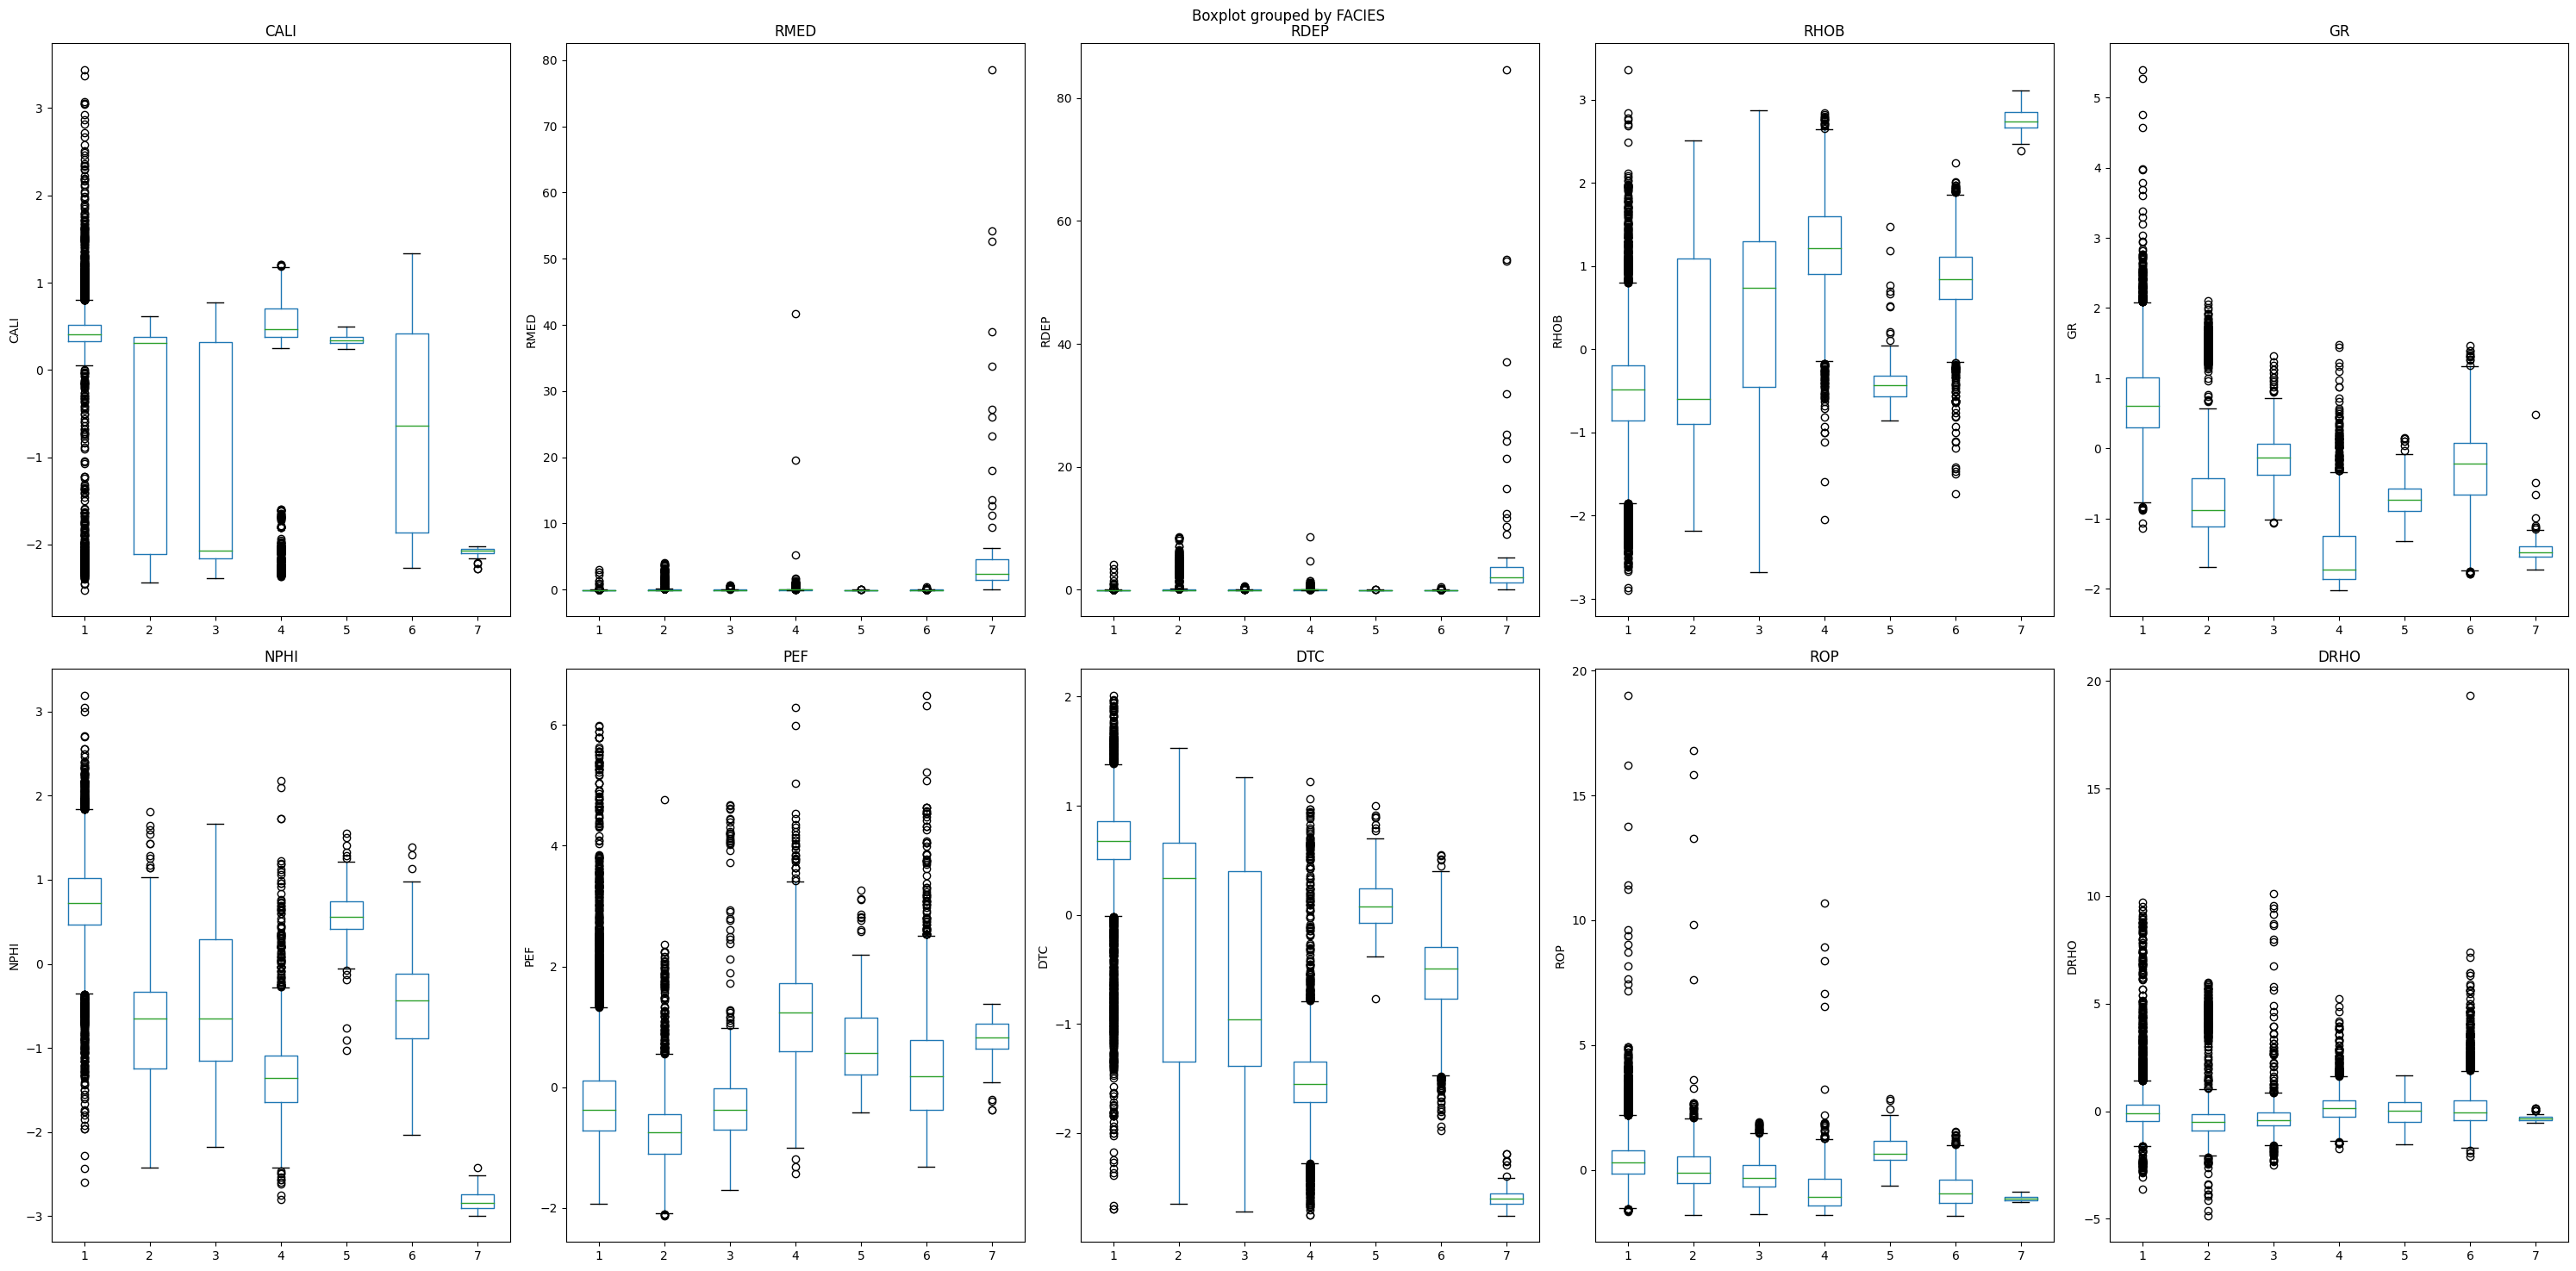

In [ ]:
fig, axes = plt.subplots((len(true_labels.columns)-1) // 5, 5, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(true_labels.columns[:-1]):
    ax = axes[i]
    true_labels.boxplot(column=[col], by=['FACIES'], grid=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel(col)


plt.tight_layout()
plt.show()


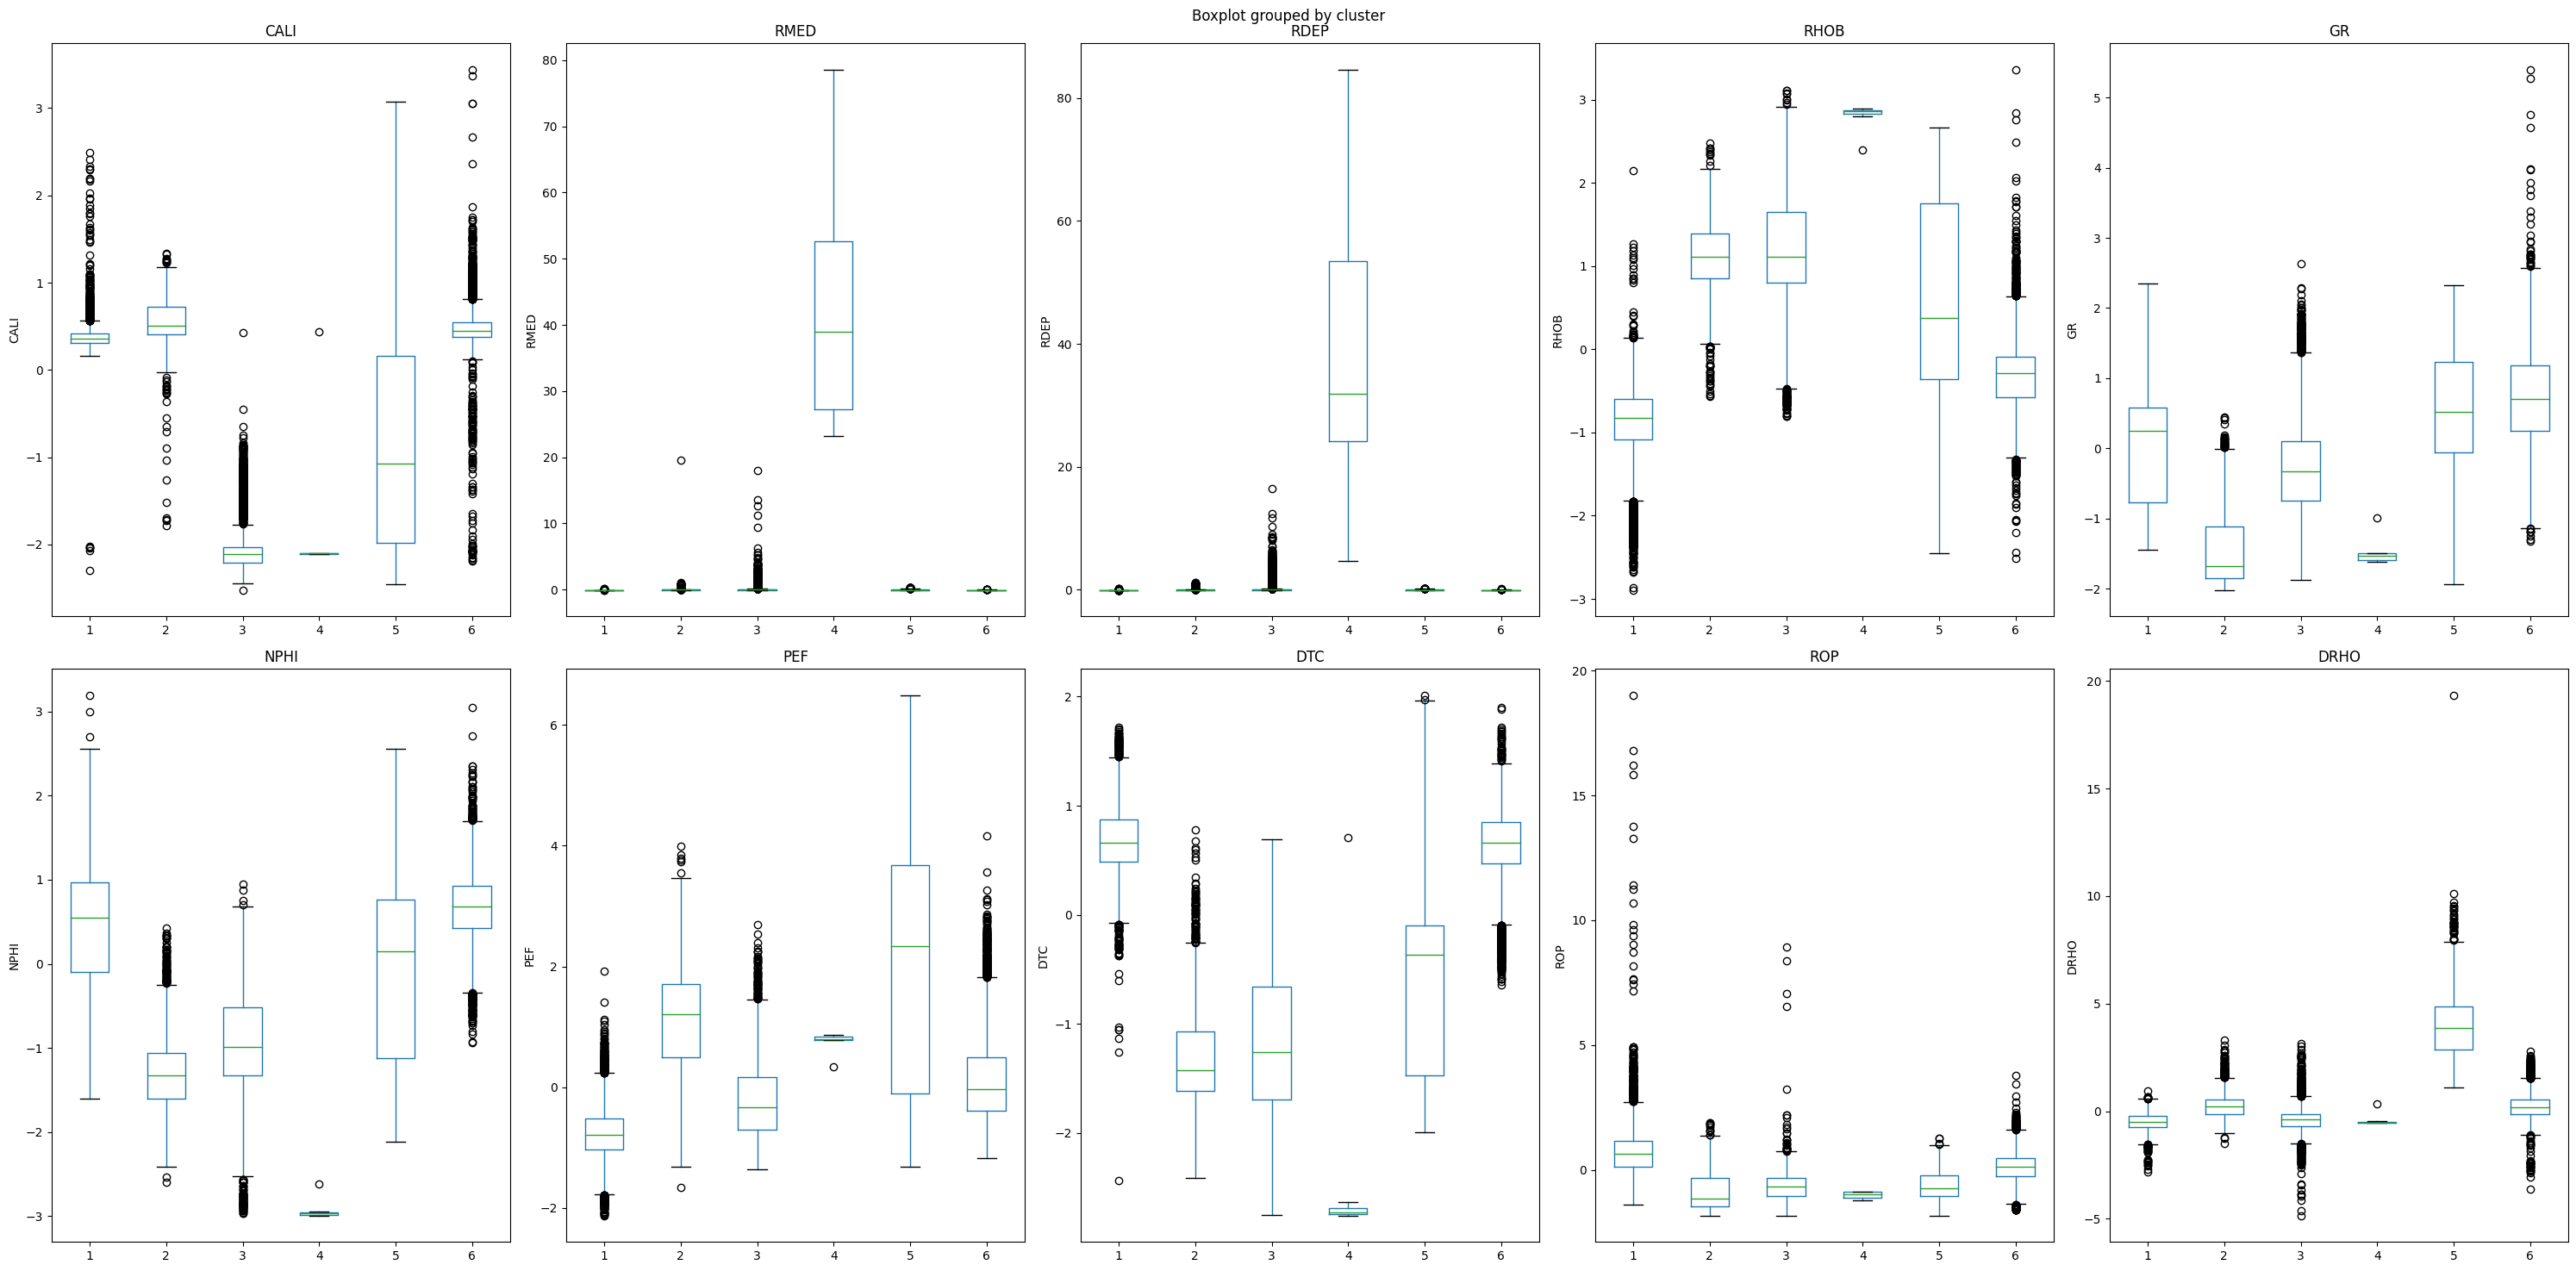

In [ ]:
fig, axes = plt.subplots((len(X_with_head.columns)-1) // 5, 5, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(X_with_head.columns[:-1]):
    ax = axes[i]
    X_with_head.boxplot(column=[col], by=['cluster'], grid=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel(col)


plt.tight_layout()
plt.show()

In [ ]:
X_train_joined, X_test_joined, y_train_joined, y_test_joined = train_test_split(X_imputed, y_joined, test_size=0.2, random_state=32)

#MLP

In [ ]:
hidden_layer_sizes = []
for i in range(20, 51, 10):
  for j in range(1,51,10):
    hidden_layer_sizes.append((i,j))

In [ ]:
grid_search = GridSearchCV(cv=10, estimator=MLPRegressor(),
                           param_grid={'activation':['identity', 'logistic', 'tanh', 'relu'],
                                       'solver' : ['lbfgs', 'sgd', 'adam'],
                                       'hidden_layer_sizes': hidden_layer_sizes},
                           scoring='r2', n_jobs=3)

In [ ]:
grid_search.fit(X_train, y_train)

c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=3,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(20, 1), (20, 11), (20, 21),
                                                (20, 31), (20, 41), (30, 1),
                                                (30, 11), (30, 21), (30, 31),
                                                (30, 41), (40, 1), (40, 11),
                                                (40, 21), (40, 31), (40, 41),
                                                (50, 1), (50, 11), (50, 21),
                                                (50, 31), (50, 41)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2')

c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

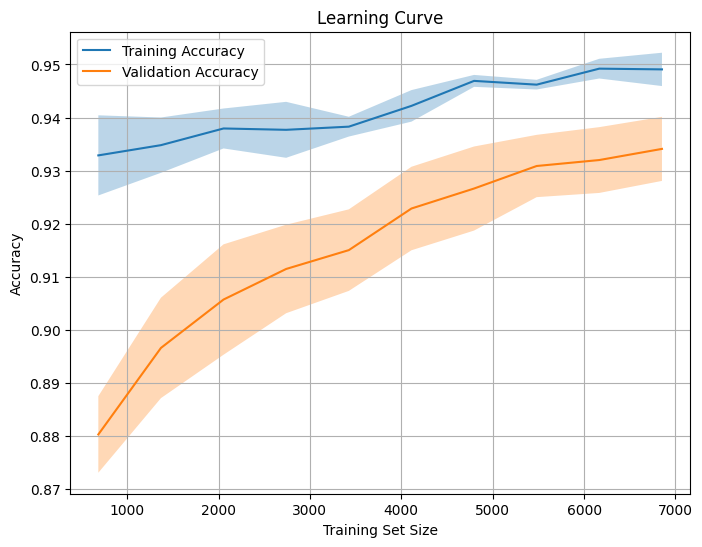

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Create learning curve using best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
162,5.537300,0.460077,0.002299,0.000641,tanh,"(40, 41)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.946949,0.931903,...,0.929827,0.939188,0.931875,0.945419,0.946991,0.935062,0.921062,0.937083,0.008166,1
171,4.720398,0.215782,0.002199,0.000600,tanh,"(50, 21)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.950477,0.930944,...,0.938498,0.938046,0.937901,0.937183,0.945223,0.938449,0.911739,0.936988,0.009746,2
141,3.386800,0.236243,0.001598,0.000490,tanh,"(30, 21)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.948486,0.937659,...,0.932341,0.935615,0.933158,0.941419,0.947500,0.928608,0.916280,0.936350,0.009086,3
159,4.753778,0.276924,0.002000,0.000002,tanh,"(40, 31)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.949267,0.929836,...,0.930424,0.937342,0.928302,0.944802,0.945615,0.931476,0.915359,0.935924,0.010196,4
179,6.161209,0.148037,0.001937,0.000485,tanh,"(50, 41)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.952540,0.932690,...,0.930854,0.934813,0.930286,0.934259,0.947106,0.933226,0.915766,0.935413,0.009636,5
164,5.617499,0.148914,0.001800,0.000601,tanh,"(40, 41)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.952067,0.930874,...,0.925885,0.932835,0.930143,0.938780,0.949156,0.929639,0.915412,0.935404,0.011172,6
177,6.134834,0.387655,0.002270,0.000487,tanh,"(50, 41)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.949390,0.930714,...,0.931870,0.933621,0.933440,0.941169,0.948224,0.927071,0.913955,0.935166,0.010049,7
153,3.267599,0.218873,0.001401,0.000490,tanh,"(40, 11)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.943236,0.919641,...,0.932124,0.935498,0.926777,0.950021,0.954452,0.930389,0.913243,0.935057,0.012579,8
138,2.560099,0.182816,0.001399,0.000491,tanh,"(30, 11)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.949710,0.928284,...,0.936926,0.946022,0.928222,0.937996,0.943089,0.929775,0.900508,0.934190,0.013259,9
168,3.870208,0.262687,0.001899,0.000539,tanh,"(50, 11)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.957627,0.917272,...,0.923506,0.936417,0.927820,0.950278,0.946919,0.924294,0.915654,0.934130,0.013824,10


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
r2_score(y_pred, y_test)

0.9332158940623032

In [ ]:
y_pred_blind = grid_search.best_estimator_.predict(X_C)

In [ ]:
r2_score(y_pred_blind, y_C)

0.6093359560779656

##Well B

In [ ]:
hidden_layer_sizes = []
for i in range(20, 51, 10):
  for j in range(1,51,10):
    hidden_layer_sizes.append((i,j))

In [ ]:
grid_search = GridSearchCV(cv=10, estimator=MLPRegressor(),
                           param_grid={'activation':['identity', 'logistic', 'tanh', 'relu'],
                                       'solver' : ['lbfgs', 'sgd', 'adam'],
                                       'hidden_layer_sizes': hidden_layer_sizes},
                           scoring='r2', n_jobs=3)

In [ ]:
grid_search.fit(X_train_B, y_train_B)

c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=3,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(20, 1), (20, 11), (20, 21),
                                                (20, 31), (20, 41), (30, 1),
                                                (30, 11), (30, 21), (30, 31),
                                                (30, 41), (40, 1), (40, 11),
                                                (40, 21), (40, 31), (40, 41),
                                                (50, 1), (50, 11), (50, 21),
                                                (50, 31), (50, 41)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2')

c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

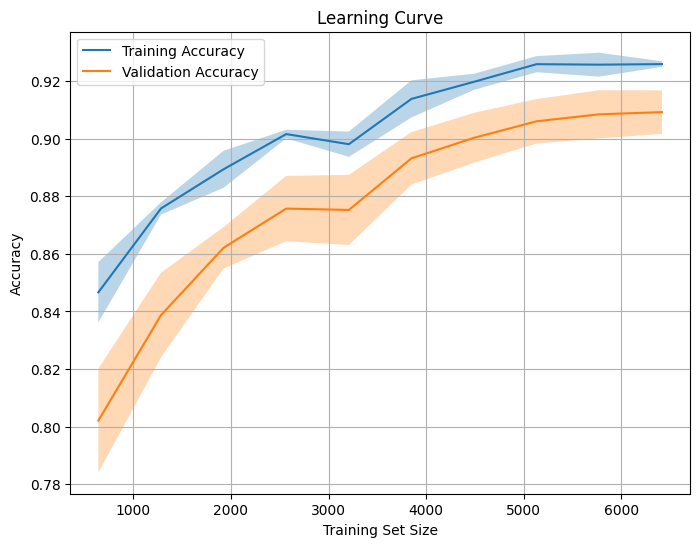

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Create learning curve using best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_B, y_train_B, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
168,3.727299,0.314024,0.001601,0.000491,tanh,"(50, 11)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.938564,0.914427,...,0.936287,0.912179,0.921511,0.935175,0.936439,0.913878,0.938284,0.926189,0.011033,1
159,4.401300,0.314600,0.001701,0.000458,tanh,"(40, 31)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.929383,0.916394,...,0.939607,0.911814,0.914033,0.922599,0.924167,0.910265,0.946999,0.924131,0.011410,2
171,4.445299,0.361443,0.001398,0.000491,tanh,"(50, 21)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.928448,0.906712,...,0.951382,0.919959,0.910724,0.915484,0.937991,0.914751,0.937377,0.923547,0.013859,3
177,5.791100,0.495474,0.001899,0.000299,tanh,"(50, 41)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.923872,0.912020,...,0.943795,0.920362,0.909716,0.924024,0.937019,0.897702,0.939412,0.923315,0.013594,4
174,5.124697,0.361374,0.001802,0.000401,tanh,"(50, 31)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.935188,0.913121,...,0.940769,0.916352,0.917071,0.922066,0.931595,0.903490,0.936054,0.922930,0.011642,5
156,3.756200,0.225505,0.001500,0.000501,tanh,"(40, 21)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.931232,0.915393,...,0.931163,0.910754,0.922025,0.921993,0.929239,0.910121,0.941291,0.922099,0.010522,6
138,2.360252,0.176146,0.001199,0.000599,tanh,"(30, 11)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.929211,0.893225,...,0.940637,0.920035,0.917885,0.924567,0.925317,0.916933,0.935402,0.921439,0.012590,7
141,3.186899,0.218428,0.001401,0.000663,tanh,"(30, 21)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.931772,0.904000,...,0.941715,0.913676,0.911668,0.929019,0.929274,0.903002,0.941093,0.921339,0.014138,8
162,5.103497,0.313104,0.001600,0.000663,tanh,"(40, 41)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.925554,0.912281,...,0.933449,0.910466,0.914002,0.930231,0.918326,0.901015,0.929628,0.918551,0.010134,9
147,4.447500,0.340170,0.001697,0.000459,tanh,"(30, 41)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.929408,0.898698,...,0.937781,0.918719,0.905875,0.915958,0.921060,0.905677,0.937009,0.918264,0.012642,10


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test_B)

In [ ]:
r2_score(y_pred, y_test_B)

0.9197656177910759

In [ ]:
y_pred_blind = grid_search.best_estimator_.predict(X_C)

In [ ]:
r2_score(y_pred_blind, y_C)

0.5972617368082367

##A and B Joined

In [ ]:
hidden_layer_sizes = []
for i in range(20, 51, 10):
  for j in range(1,51,10):
    hidden_layer_sizes.append((i,j))

In [ ]:
grid_search = GridSearchCV(cv=10, estimator=MLPRegressor(),
                           param_grid={'activation':['identity', 'logistic', 'tanh', 'relu'],
                                       'solver' : ['lbfgs', 'sgd', 'adam'],
                                       'hidden_layer_sizes': hidden_layer_sizes},
                           scoring='r2', n_jobs=3)

In [ ]:
grid_search.fit(X_train_joined, y_train_joined)

c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=3,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(20, 1), (20, 11), (20, 21),
                                                (20, 31), (20, 41), (30, 1),
                                                (30, 11), (30, 21), (30, 31),
                                                (30, 41), (40, 1), (40, 11),
                                                (40, 21), (40, 31), (40, 41),
                                                (50, 1), (50, 11), (50, 21),
                                                (50, 31), (50, 41)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2')

c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ifebr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

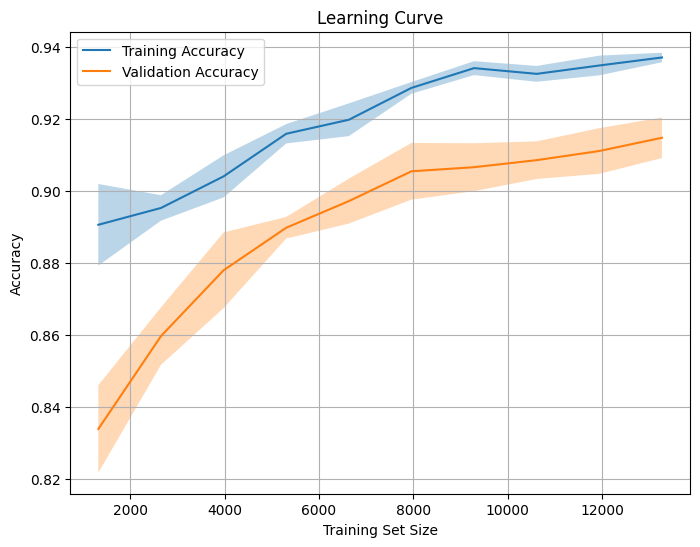

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Create learning curve using best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_joined, y_train_joined, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
179,12.308898,0.280994,0.002501,0.000500,tanh,"(50, 41)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.914859,0.906484,...,0.916236,0.907928,0.919871,0.941363,0.915540,0.911619,0.922347,0.917936,0.009424,1
171,9.874899,0.672341,0.002802,0.000750,tanh,"(50, 21)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.911352,0.896327,...,0.907412,0.926025,0.920999,0.939047,0.918401,0.916981,0.917341,0.917461,0.010717,2
176,11.671800,0.471728,0.002500,0.000500,tanh,"(50, 31)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.910410,0.902686,...,0.918442,0.916360,0.920895,0.933012,0.915896,0.909242,0.919162,0.917231,0.008201,3
177,12.624100,1.041550,0.003200,0.000749,tanh,"(50, 41)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.920874,0.897365,...,0.916642,0.922905,0.909960,0.931245,0.919823,0.902498,0.918602,0.916437,0.009805,4
174,11.222698,0.824274,0.002700,0.000641,tanh,"(50, 31)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.914449,0.907002,...,0.909043,0.916511,0.915783,0.933106,0.912609,0.910242,0.922437,0.916187,0.007296,5
164,11.333197,0.481716,0.002601,0.000490,tanh,"(40, 41)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.912387,0.907226,...,0.909709,0.912282,0.917763,0.936556,0.910580,0.907293,0.918041,0.915551,0.008575,6
161,9.781742,0.443427,0.002400,0.000497,tanh,"(40, 31)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.903511,0.898745,...,0.909221,0.915500,0.917825,0.940391,0.907494,0.910677,0.917622,0.914528,0.011174,7
149,9.668199,0.313179,0.001904,0.000303,tanh,"(30, 41)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.915113,0.894553,...,0.914913,0.912212,0.912732,0.933708,0.914332,0.902704,0.917260,0.914503,0.010448,8
158,8.799798,0.312854,0.002102,0.000540,tanh,"(40, 21)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.911486,0.899829,...,0.910715,0.919184,0.914596,0.932515,0.916659,0.898777,0.915195,0.914374,0.009711,9
162,11.100398,0.986958,0.002498,0.000499,tanh,"(40, 41)",lbfgs,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.917946,0.895315,...,0.909052,0.912736,0.917727,0.943267,0.913643,0.902646,0.911174,0.914246,0.011925,10


In [ ]:
y_pred_joined = grid_search.best_estimator_.predict(X_test_joined)

In [ ]:
r2_score(y_pred_joined, y_test_joined)

0.9128137462549754

In [ ]:
y_pred_joined_blind = grid_search.best_estimator_.predict(X_C)

In [ ]:
r2_score(y_pred_joined_blind, y_C)

0.706752230605913

#SVM

##Well A

In [ ]:
param_distributions = {'C': [1,2,3,4,5,6,7,8,9,10],
                       'kernel': ('linear', 'rbf','poly','sigmoid'),
                       'gamma' : ('scale', 'auto')}

grid_search_svm = GridSearchCV(cv=10, estimator=SVC(),
                            param_grid=param_distributions,
                            scoring='r2', n_jobs=3)

grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=3,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='r2')

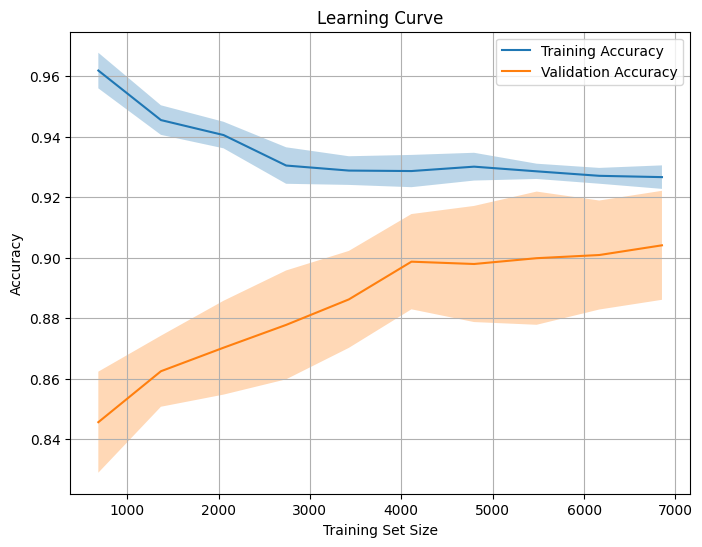

In [ ]:
# Get the best model
best_model = grid_search_svm.best_estimator_

# Create learning curve using best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
pd.DataFrame(grid_search_svm.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
77,0.388703,0.011081,0.129708,0.008631,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.929018,0.907362,...,0.905397,0.925969,0.894356,0.927769,0.932176,0.916123,0.853516,0.912187,0.022988,1
73,0.382908,0.019063,0.126305,0.008550,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.929018,0.908966,...,0.903801,0.925969,0.891154,0.921349,0.931774,0.916123,0.853516,0.911025,0.022753,2
69,0.387095,0.010331,0.135706,0.006451,9,auto,rbf,"{'C': 9, 'gamma': 'auto', 'kernel': 'rbf'}",0.929018,0.905758,...,0.894221,0.925969,0.891154,0.921349,0.931774,0.914517,0.853516,0.908422,0.022530,3
65,0.402299,0.020821,0.131402,0.009066,9,scale,rbf,"{'C': 9, 'gamma': 'scale', 'kernel': 'rbf'}",0.932226,0.907362,...,0.894221,0.923168,0.882351,0.919743,0.925353,0.912912,0.851910,0.907461,0.023607,4
61,0.374999,0.014563,0.129204,0.007017,8,auto,rbf,"{'C': 8, 'gamma': 'auto', 'kernel': 'rbf'}",0.932226,0.905758,...,0.894221,0.922768,0.881951,0.926164,0.925353,0.912912,0.850305,0.906699,0.023873,5
53,0.388096,0.014244,0.133799,0.010964,7,auto,rbf,"{'C': 7, 'gamma': 'auto', 'kernel': 'rbf'}",0.930622,0.908966,...,0.891427,0.914764,0.878749,0.924559,0.923748,0.911307,0.848700,0.905379,0.024161,6
57,0.375222,0.013579,0.125985,0.008551,8,scale,rbf,"{'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}",0.930622,0.907362,...,0.893023,0.914764,0.877149,0.926164,0.924149,0.911307,0.850305,0.905379,0.023907,7
49,0.388500,0.015185,0.133807,0.009983,7,scale,rbf,"{'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}",0.929018,0.905758,...,0.885040,0.914764,0.875548,0.922954,0.925755,0.912912,0.848700,0.904180,0.024869,8
45,0.380908,0.006683,0.136493,0.005259,6,auto,rbf,"{'C': 6, 'gamma': 'auto', 'kernel': 'rbf'}",0.923002,0.907362,...,0.885040,0.916365,0.869145,0.921349,0.926156,0.906491,0.848700,0.902657,0.025094,9
41,0.377492,0.010090,0.140099,0.007271,6,scale,rbf,"{'C': 6, 'gamma': 'scale', 'kernel': 'rbf'}",0.923002,0.905357,...,0.885439,0.916365,0.869545,0.924559,0.924551,0.904484,0.845489,0.902175,0.025773,10


In [ ]:
y_pred = grid_search_svm.best_estimator_.predict(X_test)

In [ ]:
r2_score(y_pred, y_test)

0.8987026782037383

In [ ]:
y_pred_blind_svm = grid_search_svm.best_estimator_.predict(X_C)

In [ ]:
r2_score(y_pred_blind_svm, y_C)

0.5477095922796918

##WELL B

In [ ]:
param_distributions = {'C': [1,2,3,4,5,6,7,8,9,10],
                       'kernel': ('linear', 'rbf','poly','sigmoid'),
                       'gamma' : ('scale', 'auto')}

grid_search_svm = GridSearchCV(cv=10, estimator=SVC(),
                            param_grid=param_distributions,
                            scoring='r2', n_jobs=3)

grid_search_svm.fit(X_train_B, y_train_B)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=3,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='r2')

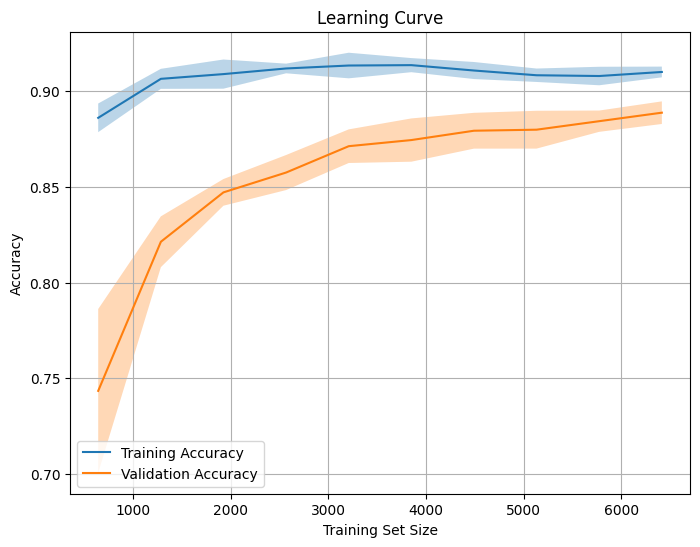

In [ ]:
# Get the best model
best_model = grid_search_svm.best_estimator_

# Create learning curve using best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_B, y_train_B, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
pd.DataFrame(grid_search_svm.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
77,0.429099,0.012827,0.115304,0.007347,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.898650,0.887762,...,0.906064,0.861240,0.898169,0.915726,0.869688,0.872809,0.916605,0.891761,0.018109,1
73,0.435498,0.018969,0.118200,0.007807,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.896694,0.877985,...,0.900218,0.875272,0.895828,0.915726,0.869688,0.872809,0.916217,0.891250,0.016095,2
69,0.439507,0.012402,0.119492,0.006119,9,auto,rbf,"{'C': 9, 'gamma': 'auto', 'kernel': 'rbf'}",0.896694,0.887762,...,0.906454,0.861240,0.898169,0.915726,0.869297,0.872809,0.915054,0.891214,0.017929,3
65,0.453401,0.028320,0.125097,0.011535,9,scale,rbf,"{'C': 9, 'gamma': 'scale', 'kernel': 'rbf'}",0.896303,0.877594,...,0.898269,0.875662,0.895828,0.915336,0.859544,0.859544,0.915054,0.888207,0.018961,4
61,0.489898,0.022079,0.125200,0.015606,8,auto,rbf,"{'C': 8, 'gamma': 'auto', 'kernel': 'rbf'}",0.896303,0.877594,...,0.898269,0.861240,0.895828,0.915336,0.869297,0.859544,0.915054,0.886762,0.019395,5
57,0.433598,0.018591,0.125200,0.009673,8,scale,rbf,"{'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}",0.896303,0.877594,...,0.898269,0.869426,0.895828,0.916897,0.859544,0.859153,0.914666,0.886684,0.019844,6
53,0.448902,0.014974,0.122901,0.013606,7,auto,rbf,"{'C': 7, 'gamma': 'auto', 'kernel': 'rbf'}",0.896303,0.877594,...,0.898659,0.855394,0.895828,0.916897,0.868907,0.855642,0.916217,0.886295,0.021145,7
33,0.446299,0.009171,0.128099,0.008144,5,scale,rbf,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}",0.895520,0.879941,...,0.898269,0.872934,0.903241,0.913775,0.851740,0.845498,0.908460,0.886144,0.022074,8
49,0.447294,0.014784,0.116100,0.006863,7,scale,rbf,"{'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}",0.896303,0.877594,...,0.898269,0.869815,0.895828,0.916897,0.849399,0.855642,0.910399,0.885048,0.021260,9
37,0.433997,0.017826,0.124004,0.009502,5,auto,rbf,"{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}",0.895911,0.868209,...,0.898659,0.862020,0.893877,0.912215,0.851740,0.852911,0.908848,0.883645,0.021613,10


In [ ]:
y_pred = grid_search_svm.best_estimator_.predict(X_test_B)

In [ ]:
r2_score(y_pred, y_test_B)

0.8873583494619814

In [ ]:
y_pred_blind_svm = grid_search_svm.best_estimator_.predict(X_C)

In [ ]:
r2_score(y_pred_blind_svm, y_C)

0.4436803935816386

##A and B Joined

In [ ]:
param_distributions = {'C': [1,2,3,4,5,6,7,8,9,10],
                       'kernel': ('linear', 'rbf','poly','sigmoid'),
                       'gamma' : ('scale', 'auto')}

grid_search_svm = GridSearchCV(cv=10, estimator=SVC(),
                            param_grid=param_distributions,
                            scoring='r2', n_jobs=3)

grid_search_svm.fit(X_train_joined, y_train_joined)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=3,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='r2')

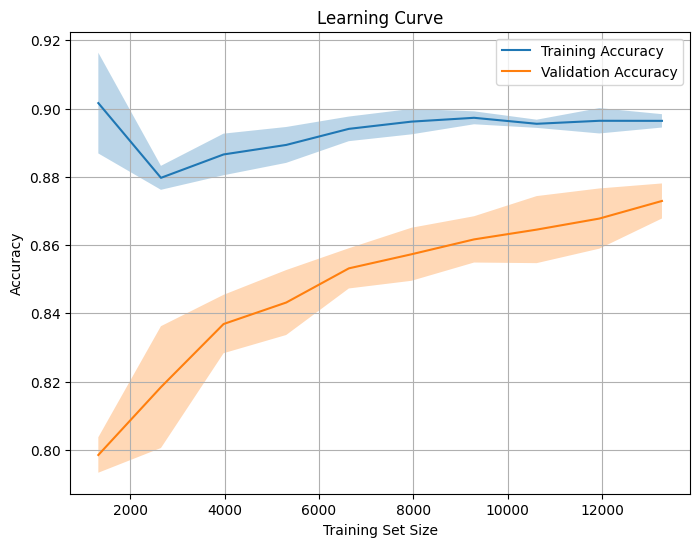

In [ ]:
# Get the best model
best_model = grid_search_svm.best_estimator_

# Create learning curve using best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_joined, y_train_joined, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
pd.DataFrame(grid_search_svm.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
69,1.606498,0.043646,0.528800,0.019478,9,auto,rbf,"{'C': 9, 'gamma': 'auto', 'kernel': 'rbf'}",0.875613,0.868745,...,0.851273,0.872733,0.897346,0.910552,0.857516,0.863255,0.869192,0.875685,0.017571,1
73,1.606703,0.034384,0.510899,0.016667,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.875810,0.868745,...,0.854429,0.873917,0.898134,0.909167,0.857319,0.861672,0.863651,0.875662,0.017702,2
77,1.652006,0.071929,0.528703,0.031708,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.875613,0.867957,...,0.851273,0.873523,0.896360,0.912531,0.858704,0.863058,0.863849,0.875605,0.018274,3
65,1.651498,0.034211,0.541099,0.027390,9,scale,rbf,"{'C': 9, 'gamma': 'scale', 'kernel': 'rbf'}",0.875613,0.868548,...,0.851273,0.873523,0.897346,0.910552,0.851975,0.863255,0.868994,0.875170,0.018216,4
61,1.604001,0.031622,0.523401,0.012207,8,auto,rbf,"{'C': 8, 'gamma': 'auto', 'kernel': 'rbf'}",0.872656,0.865198,...,0.854429,0.872733,0.897543,0.914312,0.851778,0.862464,0.868994,0.875132,0.018917,5
57,1.614398,0.037206,0.530000,0.013424,8,scale,rbf,"{'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}",0.873248,0.865395,...,0.851273,0.872733,0.894784,0.906198,0.851975,0.856329,0.868994,0.873214,0.017815,6
53,1.616100,0.062670,0.533398,0.025805,7,auto,rbf,"{'C': 7, 'gamma': 'auto', 'kernel': 'rbf'}",0.874825,0.866774,...,0.849498,0.873523,0.893799,0.906990,0.851975,0.855142,0.868994,0.872800,0.017723,7
49,1.539401,0.021733,0.500694,0.011944,7,scale,rbf,"{'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}",0.875022,0.865001,...,0.854429,0.872733,0.893996,0.905209,0.851778,0.851778,0.864245,0.871890,0.017302,8
45,1.540097,0.046465,0.524611,0.014577,6,auto,rbf,"{'C': 6, 'gamma': 'auto', 'kernel': 'rbf'}",0.872262,0.865001,...,0.849301,0.867406,0.889661,0.905209,0.851184,0.854548,0.863255,0.870293,0.017196,9
41,1.614702,0.020036,0.532499,0.016863,6,scale,rbf,"{'C': 6, 'gamma': 'scale', 'kernel': 'rbf'}",0.871276,0.865001,...,0.846145,0.870563,0.883947,0.905209,0.849601,0.855933,0.863255,0.869603,0.017077,10


In [ ]:
y_pred_joined = grid_search_svm.best_estimator_.predict(X_test_joined)

In [ ]:
r2_score(y_pred_joined, y_test_joined)

0.8799295081927996

In [ ]:
y_pred_joined_blind_svm = grid_search_svm.best_estimator_.predict(X_C)

In [ ]:
r2_score(y_pred_joined_blind_svm, y_C)

0.6602500491428558